# Unified theory numeric plots for 4 modes

In [111]:
from sympy import *

# -- Symbols --

(
    x, y, z, z0, z1, g2, g3, m, n, l, k, i, j, M, N, K, H, alpha, n2, C, T, chi, t
) = symbols('''x, y, z, z0, z1, g2, g3, m, n, l, k, i, j, M, N, K, H, alpha, n2, C, T, chi, t''')

# -- Functions --

pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
zeta = Function('zeta') # Weierstrass Zeta function
wp = Function('wp') # Weierstrass P function
wpp = Function(r"\wp'") # Derivative of Weierstrass P function

u = Function('u')
v = Function('v')
U = Function('U')
V = Function('V')
rho = Function('rho')
s = Function('s')
Q = Function('Q') # Polynomial
Delta = Function('Delta')

A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
A4 = Function('A4')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
Ac4 = Function('Ac4')

# -- Canonical coordinate --

uhat = Function('uhat', latex_name=r'\hat{u}')
vhat = Function('vhat', latex_name=r'\hat{v}')
Hhat = Symbol('Hhat', latex_name=r'\hat{H}')

ubar = Function('ubar', latex_name=r'\bar{u}')
vbar = Function('vbar', latex_name=r'\bar{v}')
Hbar = Symbol('Hbar', latex_name=r'\bar{H}')
wbar = Function('wbar', latex_name=r'\bar{w}')

utilde = Function('utilde', latex_name=r'\tilde{u}')
vtilde = Function('vtilde', latex_name=r'\tilde{v}')
Htilde = Symbol('Htilde', latex_name=r'\tilde{H}')
htilde = Function('htilde', latex_name=r'\tilde{h}')
wtilde = Function('wtilde', latex_name=r'\tilde{w}')

gtilde2 = Symbol('gtilde2', latex_name=r'\tilde{g_2}')
gtilde3 = Symbol('gtilde3', latex_name=r'\tilde{g_3}')
gammatilde = IndexedBase('gammatilde', latex_name=r'\tilde{gamma}')
etilde = IndexedBase('etilde', latex_name=r'\tilde{e}')


# -- Indexed Symbols --

eta = IndexedBase('eta')
gamma = IndexedBase('gamma')

lam = IndexedBase('lambda')
Lam = IndexedBase('Lambda')
A = IndexedBase('A')
mu = IndexedBase('mu')
nu = IndexedBase('nu')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
r = IndexedBase('r')
epsilon = IndexedBase('epsilon')
omega = IndexedBase('omega')
f = IndexedBase('f')
fc = IndexedBase('fc')
F = IndexedBase('F')
beta = IndexedBase('beta')

wild = Wild('*')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# The package containing mpmath expressions for Weierstrass elliptic functions
from weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp
from mpmath import log as mplog


# Numeric solutions to diff eqs
from numpy import (
    linspace, absolute, angle, square, real, imag, conj, array as arraynp, 
    concatenate, real_if_close
)
from numpy import vectorize as np_vectorize # not to get confused with vectorise in other packages
from numpy import log as np_log
import scipy.integrate
import matplotlib.pyplot as plt
from random import random, uniform as random_uniform

import numpy as np # Late on decided to just import it all (got lazy)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = np_vectorize(mpc_to_float)

def random_complex():
    # Generate a random complex number: a + bj
    a = random_uniform(-10, 10)  # real part
    b = random_uniform(-10, 10)  # imaginary part 
    return complex(a, b)

## The general 4 mode system with a quadratic phase modulation polynomial

In [3]:
du_phase_mod_part = (a[j] + Sum(a[j,k]*u(z,mu[k])*v(z,mu[k]), (k,1,4)))*u(z,mu[j])
du_mixing_part = Product(v(z,mu[k]), (k,1,4))/v(z, mu[j])
duj = Eq(diff(u(z,mu[j]),z), -du_phase_mod_part + du_mixing_part)

dv_phase_mod_part = -(a[j] + Sum(a[j,k]*u(z,mu[k])*v(z,mu[k]), (k,1,4)))*v(z,mu[j])
dv_mixing_part = -Product(u(z,mu[k]), (k,1,4))/u(z, mu[j])
dvj = Eq(diff(v(z,mu[j]),z), (-dv_phase_mod_part).factor() + dv_mixing_part)

Quv_eq = Eq(
    Q(u(z, mu[1])*v(z, mu[1]), u(z, mu[2])*v(z, mu[2]), u(z, mu[3])*v(z, mu[3]), u(z, mu[4])*v(z, mu[4])),
    a[0] + Sum(a[j]*u(z, mu[j])*v(z, mu[j]), (j,1,4)) + 
    Sum(a[j,k]*u(z, mu[j])*v(z, mu[j])*u(z, mu[k])*v(z, mu[k]), (j,1,4), (j,1,4))
)

# duj
# dvj
# Quv_eq
du_js = [duj.subs(j,_j).doit() for _j in range(1,5)]
dv_js = [dvj.subs(j,_j).doit() for _j in range(1,5)]

for _eq in du_js:
    _eq
    
for _eq in dv_js:
    _eq

Eq(Derivative(u(z, mu[1]), z), -(u(z, mu[1])*v(z, mu[1])*a[1, 1] + u(z, mu[2])*v(z, mu[2])*a[1, 2] + u(z, mu[3])*v(z, mu[3])*a[1, 3] + u(z, mu[4])*v(z, mu[4])*a[1, 4] + a[1])*u(z, mu[1]) + v(z, mu[2])*v(z, mu[3])*v(z, mu[4]))

Eq(Derivative(u(z, mu[2]), z), -(u(z, mu[1])*v(z, mu[1])*a[2, 1] + u(z, mu[2])*v(z, mu[2])*a[2, 2] + u(z, mu[3])*v(z, mu[3])*a[2, 3] + u(z, mu[4])*v(z, mu[4])*a[2, 4] + a[2])*u(z, mu[2]) + v(z, mu[1])*v(z, mu[3])*v(z, mu[4]))

Eq(Derivative(u(z, mu[3]), z), -(u(z, mu[1])*v(z, mu[1])*a[3, 1] + u(z, mu[2])*v(z, mu[2])*a[3, 2] + u(z, mu[3])*v(z, mu[3])*a[3, 3] + u(z, mu[4])*v(z, mu[4])*a[3, 4] + a[3])*u(z, mu[3]) + v(z, mu[1])*v(z, mu[2])*v(z, mu[4]))

Eq(Derivative(u(z, mu[4]), z), -(u(z, mu[1])*v(z, mu[1])*a[4, 1] + u(z, mu[2])*v(z, mu[2])*a[4, 2] + u(z, mu[3])*v(z, mu[3])*a[4, 3] + u(z, mu[4])*v(z, mu[4])*a[4, 4] + a[4])*u(z, mu[4]) + v(z, mu[1])*v(z, mu[2])*v(z, mu[3]))

Eq(Derivative(v(z, mu[1]), z), (u(z, mu[1])*v(z, mu[1])*a[1, 1] + u(z, mu[2])*v(z, mu[2])*a[1, 2] + u(z, mu[3])*v(z, mu[3])*a[1, 3] + u(z, mu[4])*v(z, mu[4])*a[1, 4] + a[1])*v(z, mu[1]) - u(z, mu[2])*u(z, mu[3])*u(z, mu[4]))

Eq(Derivative(v(z, mu[2]), z), (u(z, mu[1])*v(z, mu[1])*a[2, 1] + u(z, mu[2])*v(z, mu[2])*a[2, 2] + u(z, mu[3])*v(z, mu[3])*a[2, 3] + u(z, mu[4])*v(z, mu[4])*a[2, 4] + a[2])*v(z, mu[2]) - u(z, mu[1])*u(z, mu[3])*u(z, mu[4]))

Eq(Derivative(v(z, mu[3]), z), (u(z, mu[1])*v(z, mu[1])*a[3, 1] + u(z, mu[2])*v(z, mu[2])*a[3, 2] + u(z, mu[3])*v(z, mu[3])*a[3, 3] + u(z, mu[4])*v(z, mu[4])*a[3, 4] + a[3])*v(z, mu[3]) - u(z, mu[1])*u(z, mu[2])*u(z, mu[4]))

Eq(Derivative(v(z, mu[4]), z), (u(z, mu[1])*v(z, mu[1])*a[4, 1] + u(z, mu[2])*v(z, mu[2])*a[4, 2] + u(z, mu[3])*v(z, mu[3])*a[4, 3] + u(z, mu[4])*v(z, mu[4])*a[4, 4] + a[4])*v(z, mu[4]) - u(z, mu[1])*u(z, mu[2])*u(z, mu[3]))

In [4]:
a_0_init = Eq(
    a[0],
    - Sum(a[j]*u(0,mu[j])*v(0,mu[j]), (j,1,4))
    - Sum(a[j,k]/2*u(0,mu[j])*v(0,mu[j])*u(0,mu[k])*v(0,mu[k]), (j,1,4), (k,1,4))
    + Product(u(0,mu[j]),(j,1,4)) + Product(v(0,mu[j]),(j,1,4))
)

uv_j_rho = Eq(u(z,mu[j])*v(z,mu[j]), gamma[j] - rho(z))
sum_gamma_j_0 = Eq(Sum(gamma[j], (j,1,4)), 0)
rho_z_mean_uv = Eq(rho(z), -Sum(u(z,mu[j])*v(z,mu[j]), (j,1,4))/4)
gamma_j_init = Eq(gamma[j], solve(uv_j_rho, gamma[j])[0].subs(*rho_z_mean_uv.args).subs(z,0))

rho0_eq = Eq(rho(0), -Sum(u(0, mu[j])*v(0, mu[j]), (j, 1, 4))/4)
drho0_eq = Eq(
    Subs(Derivative(rho(z), z), z, 0),
    u(0, mu[1])*u(0, mu[2])*u(0, mu[3])*u(0, mu[4]) - v(0, mu[1])*v(0, mu[2])*v(0, mu[3])*v(0, mu[4])
)

a_0_init
uv_j_rho
sum_gamma_j_0
rho_z_mean_uv
gamma_j_init
rho0_eq
drho0_eq

Eq(a[0], Product(u(0, mu[j]), (j, 1, 4)) + Product(v(0, mu[j]), (j, 1, 4)) - Sum(u(0, mu[j])*v(0, mu[j])*a[j], (j, 1, 4)) - Sum(u(0, mu[j])*u(0, mu[k])*v(0, mu[j])*v(0, mu[k])*a[j, k]/2, (j, 1, 4), (k, 1, 4)))

Eq(u(z, mu[j])*v(z, mu[j]), -rho(z) + gamma[j])

Eq(Sum(gamma[j], (j, 1, 4)), 0)

Eq(rho(z), -Sum(u(z, mu[j])*v(z, mu[j]), (j, 1, 4))/4)

Eq(gamma[j], u(0, mu[j])*v(0, mu[j]) - Sum(u(0, mu[j])*v(0, mu[j]), (j, 1, 4))/4)

Eq(rho(0), -Sum(u(0, mu[j])*v(0, mu[j]), (j, 1, 4))/4)

Eq(Subs(Derivative(rho(z), z), z, 0), u(0, mu[1])*u(0, mu[2])*u(0, mu[3])*u(0, mu[4]) - v(0, mu[1])*v(0, mu[2])*v(0, mu[3])*v(0, mu[4]))

In [5]:
# Depend on a[j], a[j,k], gamma[j]
b_j_coeffs = [
    Eq(b[0], a[0] + Sum(a[j]*gamma[j], (j,1,4)) + Sum(a[j,k]/2*gamma[j]*gamma[k], (j,1,4), (k,1,4))),
    Eq(b[1], -Sum(a[j,k]/2*(gamma[j] + gamma[k]), (j,1,4), (k,1,4)) - Sum(a[j], (j,1,4))),
    Eq(b[2], Sum(a[j,k]/2, (j,1,4), (k,1,4)))
]

# Depend on gamma[j]
c_j_coeffs = [
    Eq(c[0], Product(gamma[j], (j,1,4))),
    Eq(c[1], -Sum(Product(gamma[j], (j, 1, k-1))*Product(gamma[j], (j, k+1, 4)), (k, 1, 4))),
    Eq(c[2], -Sum(((gamma[j] - gamma[k])**2)/4,(j,1,4), (k,1,4)) + 3*Sum((gamma[j]**2)/2, (j,1,4))),
    Eq(c[3], -Sum(gamma[j], (j,1,4))).subs([sum_gamma_j_0.args]),
    Eq(c[4], 1)
]

# Depend on a[j], a[j,k], gamma[j]
d_j_coeffs = [
    Eq(d[0], b[0]**2 - 4*c[0]),
    Eq(d[1], 2*b[0]*b[1] - 4*c[1]),
    Eq(d[2], 2*b[0]*b[2] + b[1]**2 - 4*c[2]),
    Eq(d[3], 2*b[1]*b[2] - 4*c[3]),
    Eq(d[4], b[2]**2 - 4*c[4])
]

# Shorthand constants for expoenntial terms Lam[0,1], Lam[1,j]
Lams = [
    Eq(
        Lam[0, j],
        -a[j] - gamma[j]*Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4 
        - Sum(a[j, k]*gamma[k], (k, 1, 4)) 
        + Sum(gamma[l]*Sum(a[l, k], (k, 1, 4)), (l, 1, 4))/2 
        + Sum(a[l], (l, 1, 4))/2
    ),
    Eq(
        Lam[1, j], 
        Sum(a[j, k], (k, 1, 4)) - Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4
    )
]

# Invariants g2, g3
g2_dj = Eq(g2, d[0]*d[4] - d[1]*d[3]/4 + d[2]**2/12)
g3_dj = Eq(g3, d[0]*d[2]*d[4]/6 - d[0]*d[3]**2/16 - d[1]**2*d[4]/16 + d[1]*d[2]*d[3]/48 - d[2]**3/216)

for _eq in b_j_coeffs + c_j_coeffs + d_j_coeffs + Lams:
    _eq
    
g2_dj
g3_dj

Eq(b[0], a[0] + Sum(a[j]*gamma[j], (j, 1, 4)) + Sum(a[j, k]*gamma[j]*gamma[k]/2, (j, 1, 4), (k, 1, 4)))

Eq(b[1], -Sum(a[j], (j, 1, 4)) - Sum((gamma[j] + gamma[k])*a[j, k]/2, (j, 1, 4), (k, 1, 4)))

Eq(b[2], Sum(a[j, k]/2, (j, 1, 4), (k, 1, 4)))

Eq(c[0], Product(gamma[j], (j, 1, 4)))

Eq(c[1], -Sum(Product(gamma[j], (j, 1, k - 1))*Product(gamma[j], (j, k + 1, 4)), (k, 1, 4)))

Eq(c[2], 3*Sum(gamma[j]**2/2, (j, 1, 4)) - Sum((gamma[j] - gamma[k])**2/4, (j, 1, 4), (k, 1, 4)))

Eq(c[3], 0)

Eq(c[4], 1)

Eq(d[0], b[0]**2 - 4*c[0])

Eq(d[1], 2*b[0]*b[1] - 4*c[1])

Eq(d[2], 2*b[0]*b[2] + b[1]**2 - 4*c[2])

Eq(d[3], 2*b[1]*b[2] - 4*c[3])

Eq(d[4], b[2]**2 - 4*c[4])

Eq(Lambda[0, j], -a[j] - gamma[j]*Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4 - Sum(a[j, k]*gamma[k], (k, 1, 4)) + Sum(gamma[l]*Sum(a[l, k], (k, 1, 4)), (l, 1, 4))/2 + Sum(a[l], (l, 1, 4))/2)

Eq(Lambda[1, j], Sum(a[j, k], (k, 1, 4)) - Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4)

Eq(g2, d[0]*d[4] - d[1]*d[3]/4 + d[2]**2/12)

Eq(g3, d[0]*d[2]*d[4]/6 - d[0]*d[3]**2/16 - d[1]**2*d[4]/16 + d[1]*d[2]*d[3]/48 - d[2]**3/216)

In [6]:
d_poly_lam = Eq(d[0] + d[1]*lam[1] + d[2]*lam[1]**2 + d[3]*lam[1]**3 + d[4]*lam[1]**4, 0)

wp_z0_eq = Eq(
    wp(z0, g2, g3),
    d[2]/12 + d[3]*lam[1]/4 + d[4]*lam[1]**2/2 + 
    (-d[1] - 2*d[2]*lam[1] - 3*d[3]*lam[1]**2 - 4*d[4]*lam[1]**3)/(4*(-rho(0) + lam[1]))
)
wpp_z0_eq = Eq(
    wpp(z0, g2, g3),
    (d[1] + 2*d[2]*lam[1] + 3*d[3]*lam[1]**2 + 4*d[4]*lam[1]**3)*
    Subs(Derivative(rho(z), z), z, 0)/(4*(rho(0) - lam[1])**2)
)

wp_z1_eq = Eq(
    wp(z1, g2, g3), 
    d[2]/12 + d[3]*lam[1]/4 + d[4]*lam[1]**2/2
)
wpp_z1_eq = Eq(
    wpp(z1, g2, g3), 
    (-d[1] - 2*d[2]*lam[1] - 3*d[3]*lam[1]**2 - 4*d[4]*lam[1]**3)*sqrt(d[4])/4
)

wp_z0_muj_eq = Eq(
    wp(-z0 + mu[j], g2, g3),
    d[2]/12 + d[3]*lam[1]/4 + d[4]*lam[1]**2/2 - 
    (-d[1] - 2*d[2]*lam[1] - 3*d[3]*lam[1]**2 - 4*d[4]*lam[1]**3)/(4*(gamma[j] - lam[1]))
)

wpp_z0_muj_eq = Eq(
    wpp(-z0 + mu[j], g2, g3),
    -(b[0] + b[1]*gamma[j] + b[2]*gamma[j]**2)*
    (d[1] + 2*d[2]*lam[1] + 3*d[3]*lam[1]**2 + 4*d[4]*lam[1]**3)/(4*(gamma[j] - lam[1])**2)
)


d_poly_lam
wp_z1_eq
wpp_z1_eq
wp_z0_eq
wpp_z0_eq
wp_z0_muj_eq
wpp_z0_muj_eq

Eq(d[0] + d[1]*lambda[1] + d[2]*lambda[1]**2 + d[3]*lambda[1]**3 + d[4]*lambda[1]**4, 0)

Eq(wp(z1, g2, g3), d[2]/12 + d[3]*lambda[1]/4 + d[4]*lambda[1]**2/2)

Eq(\wp'(z1, g2, g3), (-d[1] - 2*d[2]*lambda[1] - 3*d[3]*lambda[1]**2 - 4*d[4]*lambda[1]**3)*sqrt(d[4])/4)

Eq(wp(z0, g2, g3), d[2]/12 + d[3]*lambda[1]/4 + d[4]*lambda[1]**2/2 + (-d[1] - 2*d[2]*lambda[1] - 3*d[3]*lambda[1]**2 - 4*d[4]*lambda[1]**3)/(-4*rho(0) + 4*lambda[1]))

Eq(\wp'(z0, g2, g3), (d[1] + 2*d[2]*lambda[1] + 3*d[3]*lambda[1]**2 + 4*d[4]*lambda[1]**3)*Subs(Derivative(rho(z), z), z, 0)/(4*(rho(0) - lambda[1])**2))

Eq(wp(-z0 + mu[j], g2, g3), d[2]/12 + d[3]*lambda[1]/4 + d[4]*lambda[1]**2/2 - (-d[1] - 2*d[2]*lambda[1] - 3*d[3]*lambda[1]**2 - 4*d[4]*lambda[1]**3)/(4*gamma[j] - 4*lambda[1]))

Eq(\wp'(-z0 + mu[j], g2, g3), (-b[0] - b[1]*gamma[j] - b[2]*gamma[j]**2)*(d[1] + 2*d[2]*lambda[1] + 3*d[3]*lambda[1]**2 + 4*d[4]*lambda[1]**3)/(4*(gamma[j] - lambda[1])**2))

In [7]:
r012s = [
    Eq(
        r[0, j],
        -2*zeta(z1, g2, g3)*Lam[1, j]/sqrt(d[4]) - 
        zeta(-z0 - z1 + mu[j], g2, g3)/2 - 
        zeta(-z0 + z1 + mu[j], g2, g3)/2 + Lam[0, j] + Lam[1, j]*lam[1]
    ),
    Eq(
        r[1, j], 
        Lam[1, j]/sqrt(d[4])
    ),
    Eq(
        r[2, j], 
        Lam[1, j]/sqrt(d[4]) - Rational(1,2)
    )
]

for _eq in Lams:
    _eq
    
for _eq in r012s:
    _eq

Eq(Lambda[0, j], -a[j] - gamma[j]*Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4 - Sum(a[j, k]*gamma[k], (k, 1, 4)) + Sum(gamma[l]*Sum(a[l, k], (k, 1, 4)), (l, 1, 4))/2 + Sum(a[l], (l, 1, 4))/2)

Eq(Lambda[1, j], Sum(a[j, k], (k, 1, 4)) - Sum(a[l, k], (l, 1, 4), (k, 1, 4))/4)

Eq(r[0, j], -2*zeta(z1, g2, g3)*Lambda[1, j]/sqrt(d[4]) - zeta(-z0 - z1 + mu[j], g2, g3)/2 - zeta(-z0 + z1 + mu[j], g2, g3)/2 + Lambda[0, j] + Lambda[1, j]*lambda[1])

Eq(r[1, j], Lambda[1, j]/sqrt(d[4]))

Eq(r[2, j], Lambda[1, j]/sqrt(d[4]) - 1/2)

In [8]:
uz_sol = Eq(
    u(z, mu[j]),
    sqrt(wpp(z1, g2, g3))*sigma(z1, g2, g3)*sigma(z - 2*z0 + mu[j], g2, g3)*
    exp(z*r[0, j] + log(sigma(z - z0 + z1, g2, g3)/sigma(z - z0 - z1, g2, g3))*r[2, j] + epsilon[j])/
    sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))/
    (sigma(-z0 + mu[j], g2, g3)*sigma(z - z0 - z1, g2, g3)*d[4]**Rational(1,4))
)
vz_sol = Eq(
    v(z, mu[j]),
    sqrt(wpp(z1, g2, g3))*sigma(z1, g2, g3)*sigma(z - mu[j], g2, g3)*
    exp(-z*r[0, j] - log(sigma(z - z0 + z1, g2, g3)/sigma(z - z0 - z1, g2, g3))*r[2, j] - epsilon[j])/
    sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))/
    (sigma(-z0 + mu[j], g2, g3)*sigma(z - z0 + z1, g2, g3)*d[4]**Rational(1,4))
)
uz_sol
vz_sol

Eq(u(z, mu[j]), sqrt(\wp'(z1, g2, g3))*sigma(z1, g2, g3)*sigma(z - 2*z0 + mu[j], g2, g3)*exp(z*r[0, j] + log(sigma(z - z0 + z1, g2, g3)/sigma(z - z0 - z1, g2, g3))*r[2, j] + epsilon[j])/(sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))*sigma(-z0 + mu[j], g2, g3)*sigma(z - z0 - z1, g2, g3)*d[4]**(1/4)))

Eq(v(z, mu[j]), sqrt(\wp'(z1, g2, g3))*sigma(z1, g2, g3)*sigma(z - mu[j], g2, g3)*exp(-z*r[0, j] - log(sigma(z - z0 + z1, g2, g3)/sigma(z - z0 - z1, g2, g3))*r[2, j] - epsilon[j])/(sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))*sigma(-z0 + mu[j], g2, g3)*sigma(z - z0 + z1, g2, g3)*d[4]**(1/4)))

In [9]:
# When the quartic terms cancel to leave a cubic the solutions become:
uz_sol_cubic = Eq(
    u(z, mu[j]),
    2*sigma(z - 2*z0 + 2*z1 + mu[j], g2, g3)*
    exp(
        z*(zeta(z0 - z1 - mu[j], g2, g3) + Lam[0, j] + Lam[1, j]*d[2]/(3*d[3])) 
        - 4*zeta(z - z0 + z1, g2, g3)*Lam[1, j]/d[3] + epsilon[j]
    )/
    (sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3]))
)
vz_sol_cubic = Eq(
    v(z, mu[j]),
    2*sigma(z - mu[j], g2, g3)*
    exp(
        -z*(zeta(z0 - z1 - mu[j], g2, g3) + Lam[0, j] + Lam[1, j]*d[2]/(3*d[3])) 
        + 4*zeta(z - z0 + z1, g2, g3)*Lam[1, j]/d[3] - epsilon[j]
    )/
    (sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3]))
)

uz_sol_cubic
vz_sol_cubic

Eq(u(z, mu[j]), 2*sigma(z - 2*z0 + 2*z1 + mu[j], g2, g3)*exp(z*(zeta(z0 - z1 - mu[j], g2, g3) + Lambda[0, j] + Lambda[1, j]*d[2]/(3*d[3])) - 4*zeta(z - z0 + z1, g2, g3)*Lambda[1, j]/d[3] + epsilon[j])/(sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3])))

Eq(v(z, mu[j]), 2*sigma(z - mu[j], g2, g3)*exp(-z*(zeta(z0 - z1 - mu[j], g2, g3) + Lambda[0, j] + Lambda[1, j]*d[2]/(3*d[3])) + 4*zeta(z - z0 + z1, g2, g3)*Lambda[1, j]/d[3] - epsilon[j])/(sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3])))

In [10]:
# If u(0, mu[j])!=0, v(0, mu[j])!=0

epsilon_u = Eq(
    epsilon[j],
    solve(uz_sol.subs(z,0), epsilon[j])[0]
)

epsilon_v = Eq(
    epsilon[j],
    solve(vz_sol.subs(z,0), epsilon[j])[0]
)

epsilon_u_over_v = Eq(
    epsilon[j],
    log((
        sqrt(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*
        sigma(-z0 - z1, g2, g3)*u(0, mu[j])*
        exp(-log(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*Lam[1, j]/sqrt(d[4]))/
        sigma(-2*z0 + mu[j], g2, g3) *

        sqrt(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*
        sigma(-mu[j], g2, g3)*
        exp(-log(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*Lam[1, j]/sqrt(d[4]))/
        (sigma(-z0 + z1, g2, g3)*v(0, mu[j]))
    ).simplify())/2
)

epsilon_u
epsilon_v
epsilon_u_over_v

Eq(epsilon[j], log(sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))*sigma(-z0 - z1, g2, g3)*sigma(-z0 + mu[j], g2, g3)*u(0, mu[j])*exp(-log(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*r[2, j])*d[4]**(1/4)/(sqrt(\wp'(z1, g2, g3))*sigma(z1, g2, g3)*sigma(-2*z0 + mu[j], g2, g3))))

Eq(epsilon[j], log(sqrt(\wp'(z1, g2, g3))*sigma(z1, g2, g3)*sigma(-mu[j], g2, g3)*exp(-log(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*r[2, j])/(sqrt(wp(z1, g2, g3) - wp(-z0 + mu[j], g2, g3))*sigma(-z0 + z1, g2, g3)*sigma(-z0 + mu[j], g2, g3)*v(0, mu[j])*d[4]**(1/4))))

Eq(epsilon[j], log(sigma(-mu[j], g2, g3)*u(0, mu[j])*exp(-2*log(sigma(-z0 + z1, g2, g3)/sigma(-z0 - z1, g2, g3))*Lambda[1, j]/sqrt(d[4]))/(sigma(-2*z0 + mu[j], g2, g3)*v(0, mu[j])))/2)

In [11]:
# When the quartic terms cancel to leave a cubic the epsilon_j become:
# If u(0, mu[j])!=0, v(0, mu[j])!=0
epsilon_u_cubic = Eq(
    epsilon[j],
    log(
        sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*u(0, mu[j])*
        exp(4*zeta(-z0 + z1, g2, g3)*Lam[1, j]/d[3])*sqrt(d[3])/(2*sigma(-2*z0 + 2*z1 + mu[j], g2, g3))
    )
)
epsilon_v_cubic = Eq(
    epsilon[j],
    log(
        2*sigma(-mu[j], g2, g3)*exp(4*zeta(-z0 + z1, g2, g3)*Lam[1, j]/d[3])/
        (sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*v(0, mu[j])*sqrt(d[3]))
    )
)
epsilon_u_over_v_cubic = Eq(
    epsilon[j],
    log(
        sigma(-mu[j], g2, g3)*u(0, mu[j])*
        exp(8*zeta(-z0 + z1, g2, g3)*Lam[1, j]/d[3])/
        (sigma(-2*z0 + 2*z1 + mu[j], g2, g3)*v(0, mu[j]))
    )/2
)

epsilon_u_cubic
epsilon_v_cubic
epsilon_u_over_v_cubic

Eq(epsilon[j], log(sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*u(0, mu[j])*exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])*sqrt(d[3])/(2*sigma(-2*z0 + 2*z1 + mu[j], g2, g3))))

Eq(epsilon[j], log(2*sigma(-mu[j], g2, g3)*exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/(sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*v(0, mu[j])*sqrt(d[3]))))

Eq(epsilon[j], log(sigma(-mu[j], g2, g3)*u(0, mu[j])*exp(8*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/(sigma(-2*z0 + 2*z1 + mu[j], g2, g3)*v(0, mu[j])))/2)

## Utility functions for numerically evaluating the analytic solutions for $u,v$

In [12]:
def get_init_cons_params(
    u_v_0_init_vals: list[tuple],
    a_params: list[tuple]
) -> dict:

    ## -- Derive intermediate params --
    ## --------------------------------
    
    _init_uv_vals_params  = u_v_0_init_vals + a_params
    
    # - Calculate a[0] (Hamiltonian) -
    a_0_init_val = a_0_init.doit().subs(u_v_0_init_vals + a_params).simplify()
    _init_uv_vals_params += [a_0_init_val.args]
    
    # - Calculate gamma vals -
    _gamma_vals = [
        gamma_j_init.subs(j, _j).doit().subs(u_v_0_init_vals).simplify() 
        for _j in range(1,5)
    ]
    _init_uv_vals_params += [_.args for _ in _gamma_vals]

    # - Calculate bj vals -
    _bj_vals = [ _eq.doit().subs(_init_uv_vals_params).simplify() for _eq in b_j_coeffs]
    _init_uv_vals_params += [_.args for _ in _bj_vals]

    # - Calculate cj vals -
    _cj_vals = [ _eq.doit().subs(_init_uv_vals_params).simplify() for _eq in c_j_coeffs]
    _init_uv_vals_params += [_.args for _ in _cj_vals]

    # - Calculate dj vals -
    _dj_vals = [ _eq.doit().subs(_init_uv_vals_params).simplify() for _eq in d_j_coeffs]
    _init_uv_vals_params += [_.args for _ in _dj_vals]

    # - Calculate root lam[1] -
    _lam1_val = Eq(lam[1], solve(d_poly_lam.subs(_init_uv_vals_params), lam[1])[0])
    _init_uv_vals_params += [_lam1_val.args]
    
    # - Derive Lam[0,j], Lam[1,j] -
    _Lam0s = [Lams[0].subs(j,_j).doit().subs(_init_uv_vals_params).simplify() for _j in range(1,5)]
    _Lam1s = [Lams[1].subs(j,_j).doit().subs(_init_uv_vals_params).simplify() for _j in range(1,5)]
    
    # - Combine params -
    _params = _bj_vals + _cj_vals + _dj_vals + _gamma_vals + _Lam0s + _Lam1s + [a_0_init_val, _lam1_val]
    

    ## -- Derive invariants g2, g3 --
    ## ------------------------------
    
    _g2_val = g2_dj.subs(_init_uv_vals_params).simplify()
    _g3_val = g3_dj.subs(_init_uv_vals_params).simplify()
    _init_uv_vals_params += [_g2_val.args, _g3_val.args]
    

    ## -- Derive the values of the Weierstrass function to be inverted --
    ## ------------------------------------------------------------------
    
    # - Calculate wp, wpp values for z0 and z1 -

    _wp_val_eqs = [
        Eq(
            _eq.lhs, 
            _eq.rhs
            .subs([rho0_eq.args, drho0_eq.args])
            .doit().subs(u_v_0_init_vals)
            .subs(_init_uv_vals_params).simplify()
        )
        for _eq in [wp_z0_eq, wpp_z0_eq, wp_z1_eq, wpp_z1_eq]
    ]

    # - Calculate wp, wpp values for -z0 + mu[j] -

    _wp_z0_mujs = [
        Eq(
            wp_z0_muj_eq.lhs.subs(j,_j), 
            wp_z0_muj_eq.rhs.subs(j,_j)
            .subs(_init_uv_vals_params).simplify()
        ) 
        for _j in range(1,5)
    ]
    _wpp_z0_mujs = [
        Eq(
            wpp_z0_muj_eq.lhs.subs(j,_j), 
            wpp_z0_muj_eq.rhs.subs(j,_j)
            .subs(_init_uv_vals_params).simplify()
        )
        for _j in range(1,5)
    ]

    
    return {
        
        'params': _params,
        'invariants': [
            _g2_val,
            _g3_val
        ],
        'weierstrass_z0': [
            _wp_val_eqs[0],
            _wp_val_eqs[1]
        ],
        'weierstrass_z1': [
            _wp_val_eqs[2],
            _wp_val_eqs[3]
        ],
        'weierstrass_mu_j': _wp_z0_mujs,
        'weierstrass_prime_mu_j': _wpp_z0_mujs
        
    }

In [13]:
def get_error(val1, val2, small_val_threshold=1e-12):
    if abs(val2) >  small_val_threshold:
        return (2 * abs(val1 - val2) / abs(val1 + val2))
    else:
        return abs(val1 - val2)

def get_lattice_and_weierstrass_args(
    init_cons_params: dict,
    _wp_tolerance = 1e-13,
    _wpp_tolerance = 1e-10,
    _small_wpp_threshold = 1e-10
):
    
    # Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
    _g2_val_eq = Eq(g2, g2.subs([_eq.args for _eq in init_cons_params['invariants']]))
    _g3_val_eq = Eq(g3, g3.subs([_eq.args for _eq in init_cons_params['invariants']]))
    
    _omega_ = we.omega_from_g(_g2_val_eq.rhs, _g3_val_eq.rhs)
    _omega1_ = mpc_to_float(_omega_[0])
    _omega2_ = mpc_to_float(_omega_[1])
    _omega3_ = mpc_to_float(_omega_[2])
    if im(_omega2_/_omega1_) <= 0:
        _omega2_ = -_omega2_
    if im(_omega3_/_omega1_) <= 0:
        _omega3_ = -_omega3_
    _omegas = (_omega1_, _omega2_) 

    # Calculate complex constants in the z plane in terms of initial conditions 
    # via inverse Weierstrass P (elliptic integral)
    _input_z0_wp_val = init_cons_params['weierstrass_z0'][0].rhs
    _input_z0_wp_prime_val = init_cons_params['weierstrass_z0'][1].rhs
    _z0_val = mpc_to_float(we.invwp(
        _input_z0_wp_val, 
        _omegas, 
        _input_z0_wp_prime_val
    ))
    
    _input_z1_wp_val = init_cons_params['weierstrass_z1'][0].rhs
    _input_z1_wp_prime_val = init_cons_params['weierstrass_z1'][1].rhs
    _z1_val = mpc_to_float(we.invwp(
        _input_z1_wp_val, 
        _omegas, 
        _input_z1_wp_prime_val
    ))

    _mu_j_vals = [
        (
            _z0_val + 
            mpc_to_float(we.invwp(
                init_cons_params['weierstrass_mu_j'][_j].rhs, 
                _omegas, 
                init_cons_params['weierstrass_prime_mu_j'][_j].rhs
            ))
        )
        for _j in range(4)
    ]

    # Check that the arguments reproduce the values for wp, wpp from which they were derived
    _wp_check_vals = [
        get_error(
            we.wp(_mu_j_vals[_j] - _z0_val, _omegas), 
            init_cons_params['weierstrass_mu_j'][_j].rhs
        )
        for _j in range(4)
    ]
    _wp_check_vals.append(
        get_error(
            we.wp(_z0_val, _omegas),
            _input_z0_wp_val
        )
    )
    _wp_check_vals.append(get_error(we.wp(_z1_val, _omegas), _input_z1_wp_val))
    for i, check_val in enumerate(_wp_check_vals):
        if check_val > _wp_tolerance:
            raise ValueError(f'wp check failed on check {i}: {check_val} > {_wp_tolerance}')

    _wpp_check_vals = [
        get_error(
            we.wpprime(_mu_j_vals[_j] - _z0_val, _omegas),
            init_cons_params['weierstrass_prime_mu_j'][_j].rhs
        )
        for _j in range(4)
    ]
    _wpp_check_vals.append(get_error(we.wpprime(_z0_val, _omegas), _input_z0_wp_prime_val))
    _wpp_check_vals.append(get_error(we.wpprime(_z1_val, _omegas), _input_z1_wp_prime_val))
        
    for i, check_val in enumerate(_wpp_check_vals):
        if check_val > _wpp_tolerance:
            raise ValueError(f'wpp check failed on check {i}: {check_val} > {_wpp_tolerance}')
            
    return {
        "z0": Eq(z0, _z0_val),
        "z1": Eq(z1, _z1_val),
        "omegas": [Eq(omega[_j + 1], _v) for _j, _v in enumerate([_omega1_, _omega2_, _omega3_])],
        "mujs": [Eq(mu[_j + 1], _v) for _j, _v in enumerate(_mu_j_vals)]
    }

In [14]:
def checks( 
    u_v_0_init_vals: dict,
    init_cons_params: dict,
    lattice_and_weierstrass_args: dict,
    unity_check_tolerance=1e-13
):
    _z0 = complex(lattice_and_weierstrass_args["z0"].rhs)
    _z1 = complex(lattice_and_weierstrass_args["z1"].rhs)
    _param_subs = [_eq.args for _eq in init_cons_params["params"]]
    _sqrtd4 = complex(sqrt(d[4]).subs(_param_subs))
    _fourth_root_d4 = complex((d[4]**(Rational(1,4))).subs(_param_subs))
    _omega_subs = [_eq.args for _eq in lattice_and_weierstrass_args["omegas"]]
    _omega1 = complex(Eq(omega[1], omega[1].subs(_omega_subs)).rhs)
    _omega2 = complex(Eq(omega[2], omega[2].subs(_omega_subs)).rhs)
    _omegas = (_omega1, _omega2)
    _mu_j_vals = [complex(_eq.rhs) for _eq in lattice_and_weierstrass_args["mujs"]]
    
    
    unity_vals = [
        abs((
            1 -
            (-we.wp(_z0, _omegas) + we.wp(_z1, _omegas))
            *(we.wp(_z1, _omegas) - we.wp(-_z0 + _mu_j_vals[_j], _omegas))
            *(u(0, mu[_j+1])*v(0, mu[_j+1])).subs(u_v_0_init_vals)*_sqrtd4/
            ((-we.wp(_z0, _omegas) + we.wp(-_z0 + _mu_j_vals[_j], _omegas))*we.wpprime(_z1, _omegas))
        ).evalf())
        for _j in range(4)
    ]
    for _val in unity_vals:
        if _val > unity_check_tolerance:
            raise ValueError(f'unity_check_tolerance failed: {_val} > {unity_check_tolerance}')
    print('Unity checks passed')

In [15]:
def get_epsilon_offsets(
    u_v_0_init_vals: dict,
    init_cons_params: dict,
    lattice_and_weierstrass_args: dict,
    zeta_strategy=False,
    v0_only_strategy=False,
    ratio_test_tolerance=1e-1
):
    _z0 = complex(lattice_and_weierstrass_args["z0"].rhs)
    _z1 = complex(lattice_and_weierstrass_args["z1"].rhs)
    _param_subs = [_eq.args for _eq in init_cons_params["params"]]
    _sqrtd4 = complex(sqrt(d[4]).subs(_param_subs))
    _fourth_root_d4 = complex((d[4]**(Rational(1,4))).subs(_param_subs))
    _omega_subs = [_eq.args for _eq in lattice_and_weierstrass_args["omegas"]]
    _omega1 = complex(Eq(omega[1], omega[1].subs(_omega_subs)).rhs)
    _omega2 = complex(Eq(omega[2], omega[2].subs(_omega_subs)).rhs)
    _omegas = (_omega1, _omega2)
    _mu_j_vals = [complex(_eq.rhs) for _eq in lattice_and_weierstrass_args["mujs"]]
    
    
    
    if zeta_strategy:
        raise NotImplementedError
#         # Use this if can't use u(0), v(0) strategy because e.g., u(0)=0
#         _epsilon_j_eqs  = [
#             Eq(epsilon[_j+1], _z0*we.wzeta(_mu_j_vals[_j] - _z0, _omegas))
#             for _j in range(3)
#         ]
#         return {
#             'epsilon_j_u0_vals': _epsilon_j_eqs,
#             'epsilon_j_v0_vals': _epsilon_j_eqs
#         }

    if (not zeta_strategy) and (not v0_only_strategy):
        _epsilon_j_u0_over_v0_vals = [
            Eq(
                epsilon[_j + 1], 
                log(
                    (
                        we.wsigma(_mu_j_vals[_j], _omegas)*u(0, mu[_j + 1]).subs(u_v_0_init_vals)/
                        (we.wsigma(2*_z0 - _mu_j_vals[_j], _omegas)*v(0, mu[_j + 1]).subs(u_v_0_init_vals))*
                        exp(
                            -2*log(we.wsigma(_z0 - _z1, _omegas)/we.wsigma(_z0 + _z1, _omegas))*
                            Lam[1, _j + 1].subs(_param_subs)/_sqrtd4
                        )
                    ).expand().evalf()
                )/2
            )
            for _j in range(4)
        ]
        
    
    # u(0), v(0) strategy

    _epsilon_j_v0_vals = [
        Eq(
            epsilon[_j + 1], 
            log((
                sqrt(we.wpprime(_z1, _omegas))/
                sqrt(we.wp(_z1, _omegas) - we.wp(-_z0 + _mu_j_vals[_j], _omegas))*
                we.wsigma(_z1, _omegas)*we.wsigma(-_mu_j_vals[_j], _omegas)*
                exp(
                    -log(we.wsigma(_z0 - _z1, _omegas)/we.wsigma(_z0 + _z1, _omegas))*
                    (Lam[1, _j + 1]/_sqrtd4 - Rational(1,2)).subs(_param_subs)
                )/(
                    we.wsigma(-_z0 + _z1, _omegas)*we.wsigma(-_z0 + _mu_j_vals[_j], _omegas)*
                    v(0, mu[_j + 1]).subs(u_v_0_init_vals)*_fourth_root_d4
                )
            ).expand().evalf())
        )
        for _j in range(4)
    ]
    if v0_only_strategy:
        return {
            'epsilon_j_u0_vals': _epsilon_j_v0_vals,
            'epsilon_j_v0_vals': _epsilon_j_v0_vals
        }
        
    _epsilon_j_u0_vals = [
        Eq(
            epsilon[_j + 1], 
            log((
                sqrt(we.wp(_z1, _omegas) - we.wp(-_z0 + _mu_j_vals[_j], _omegas))*
                we.wsigma(-_z0 - _z1, _omegas)*we.wsigma(-_z0 + _mu_j_vals[_j], _omegas)*
                u(0, mu[_j + 1]).subs(u_v_0_init_vals)*_fourth_root_d4*
                exp(
                    -log(we.wsigma(_z0 - _z1, _omegas)/we.wsigma(_z0 + _z1, _omegas))*
                    (Lam[1, _j + 1]/_sqrtd4 - Rational(1,2)).subs(_param_subs)
                )/(
                    sqrt(we.wpprime(_z1, _omegas))*
                    we.wsigma(_z1, _omegas)*
                    we.wsigma(-2*_z0 + _mu_j_vals[_j], _omegas)
                )
            ).expand().evalf())
        )
        for _j in range(4)
    ]
    
    # Check the values obtained from u0 and v0 agree with those obtained by ratio method mod pi
    for _i in range(4):
        _u_abs_err = abs(_epsilon_j_u0_over_v0_vals[_i].rhs - _epsilon_j_u0_vals[_i].rhs)
        _u_abs_err = min(abs(_u_abs_err - pi.evalf()), _u_abs_err) % pi.evalf()
        if _u_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_abs_err check failed: {_u_abs_err} > {ratio_test_tolerance}')
    for _i in range(4):
        _v_abs_err = abs(_epsilon_j_u0_over_v0_vals[_i].rhs - _epsilon_j_v0_vals[_i].rhs)
        _v_abs_err = min(abs(_v_abs_err - pi.evalf()), _v_abs_err) % pi.evalf()
        if _v_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_abs_err check failed: {_v_abs_err} > {ratio_test_tolerance}') 
            
    # Check the values obtained from u0 and v0 agree with each other
    for _i in range(4):
        _u_min_v_abs_err = abs(_epsilon_j_u0_vals[_i].rhs - _epsilon_j_v0_vals[_i].rhs)
        _u_min_v_abs_err = min(abs(_u_min_v_abs_err - pi.evalf()), _u_min_v_abs_err) % pi.evalf()
        if _u_min_v_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_min_v_abs_err check failed: {_u_min_v_abs_err} > {ratio_test_tolerance}')
        
    return {
        'epsilon_j_u0_vals': _epsilon_j_u0_vals,
        'epsilon_j_v0_vals': _epsilon_j_v0_vals
    }

In [16]:
epsilon_u_cubic
epsilon_v_cubic
epsilon_u_over_v_cubic

Eq(epsilon[j], log(sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*u(0, mu[j])*exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])*sqrt(d[3])/(2*sigma(-2*z0 + 2*z1 + mu[j], g2, g3))))

Eq(epsilon[j], log(2*sigma(-mu[j], g2, g3)*exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/(sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*v(0, mu[j])*sqrt(d[3]))))

Eq(epsilon[j], log(sigma(-mu[j], g2, g3)*u(0, mu[j])*exp(8*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/(sigma(-2*z0 + 2*z1 + mu[j], g2, g3)*v(0, mu[j])))/2)

In [17]:
def get_epsilon_offsets_cubic(
    u_v_0_init_vals: dict,
    init_cons_params: dict,
    lattice_and_weierstrass_args: dict,
    zeta_strategy=False,
    v0_only_strategy=False,
    ratio_test_tolerance=1e-1
):
    _z0 = complex(lattice_and_weierstrass_args["z0"].rhs)
    _z1 = complex(lattice_and_weierstrass_args["z1"].rhs)
    _param_subs = [_eq.args for _eq in init_cons_params["params"]]
    _d_3 = complex(d[3].subs(_param_subs))
    _sqrtd3 = _d_3 ** 0.5
    _omega_subs = [_eq.args for _eq in lattice_and_weierstrass_args["omegas"]]
    _omega1 = complex(Eq(omega[1], omega[1].subs(_omega_subs)).rhs)
    _omega2 = complex(Eq(omega[2], omega[2].subs(_omega_subs)).rhs)
    _omegas = (_omega1, _omega2)
    _mu_j_vals = [complex(_eq.rhs) for _eq in lattice_and_weierstrass_args["mujs"]]
    
    
    
    if zeta_strategy:
        raise NotImplementedError
#         # Use this if can't use u(0), v(0) strategy because e.g., u(0)=0
#         _epsilon_j_eqs  = [
#             Eq(epsilon[_j+1], _z0*we.wzeta(_mu_j_vals[_j] - _z0, _omegas))
#             for _j in range(3)
#         ]
#         return {
#             'epsilon_j_u0_vals': _epsilon_j_eqs,
#             'epsilon_j_v0_vals': _epsilon_j_eqs
#         }


#     (epsilon[j],
#     log(
#         sigma(-mu[j], g2, g3)*u(0, mu[j])*
#         exp(8*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/
#         (sigma(-2*z0 + 2*z1 + mu[j], g2, g3)*v(0, mu[j]))
#     )/2
#     )

    if (not zeta_strategy) and (not v0_only_strategy):
        _epsilon_j_u0_over_v0_vals = [
            Eq(
                epsilon[_j + 1], 
                log(
                    complex(
                        we.wsigma(_mu_j_vals[_j], _omegas)*u(0, mu[_j + 1]).subs(u_v_0_init_vals)/
                        (
                            we.wsigma(2*_z0 - 2*_z1 - _mu_j_vals[_j], _omegas)*
                            v(0, mu[_j + 1]).subs(u_v_0_init_vals)
                        )*
                        exp(8*we.wzeta(-_z0 + _z1, _omegas)*Lam[1, _j + 1].subs(_param_subs)/_d_3)
                    )
                )/2
            )
            for _j in range(4)
        ]
        
    
    # u(0), v(0) strategy

#     _epsilon_j_v0_vals = [
#         Eq(
#             epsilon[_j + 1], 
#             log((
#                 sqrt(we.wpprime(_z1, _omegas))/
#                 sqrt(we.wp(_z1, _omegas) - we.wp(-_z0 + _mu_j_vals[_j], _omegas))*
#                 we.wsigma(_z1, _omegas)*we.wsigma(-_mu_j_vals[_j], _omegas)*
#                 exp(
#                     -log(we.wsigma(_z0 - _z1, _omegas)/we.wsigma(_z0 + _z1, _omegas))*
#                     (Lam[1, _j + 1]/_sqrtd4 - Rational(1,2)).subs(_param_subs)
#                 )/(
#                     we.wsigma(-_z0 + _z1, _omegas)*we.wsigma(-_z0 + _mu_j_vals[_j], _omegas)*
#                     v(0, mu[_j + 1]).subs(u_v_0_init_vals)*_fourth_root_d4
#                 )
#             ).expand().evalf())
#         )
#         for _j in range(4)
#     ]

#     (epsilon[j],
#     log(
#         2*sigma(-mu[j], g2, g3)*
#         exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])/
#         (sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*v(0, mu[j])*sqrt(d[3]))
#     )
#     )
    _epsilon_j_v0_vals = [
        Eq(
            epsilon[_j + 1], 
            log(complex(
                2*we.wsigma(-_mu_j_vals[_j], _omegas)*
                exp(4*we.wzeta(- _z0 + _z1, _omegas)*Lam[1, _j + 1].subs(_param_subs)/_d_3)/
                (
                    we.wsigma(-_z0 + _z1, _omegas) *
                    we.wsigma(-_z0 + _z1 +_mu_j_vals[_j], _omegas) *
                    v(0, mu[_j + 1]).subs(u_v_0_init_vals) * _sqrtd3
                )
            ))
        )
        for _j in range(4)
    ]
    if v0_only_strategy:
        return {
            'epsilon_j_u0_vals': _epsilon_j_v0_vals,
            'epsilon_j_v0_vals': _epsilon_j_v0_vals
        }
    
    
#     (epsilon[j],
#     log(
#         sigma(-z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*u(0, mu[j])
#         *exp(4*zeta(-z0 + z1, g2, g3)*Lambda[1, j]/d[3])*sqrt(d[3])/(2*sigma(-2*z0 + 2*z1 + mu[j], g2, g3))
#     )
#     )
        
    _epsilon_j_u0_vals = [
        Eq(
            epsilon[_j + 1], 
            log(complex(
                we.wsigma(-_z0 + _z1, _omegas)*we.wsigma(-_z0 + _z1 + _mu_j_vals[_j], _omegas)*
                u(0, mu[_j + 1]).subs(u_v_0_init_vals)*_sqrtd3*
                exp(4*we.wzeta(- _z0 + _z1, _omegas)*Lam[1, _j + 1].subs(_param_subs)/_d_3)/
                (2*we.wsigma(-2*_z0 + 2*_z1 +_mu_j_vals[_j], _omegas))
            ))
        )
        for _j in range(4)
    ]
    
    # Check the values obtained from u0 and v0 agree with those obtained by ratio method mod pi
    for _i in range(4):
        _u_abs_err = abs(_epsilon_j_u0_over_v0_vals[_i].rhs - _epsilon_j_u0_vals[_i].rhs)
        _u_abs_err = min(abs(_u_abs_err - pi.evalf()), _u_abs_err) % pi.evalf()
        if _u_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_abs_err check failed: {_u_abs_err} > {ratio_test_tolerance}')
    for _i in range(4):
        _v_abs_err = abs(_epsilon_j_u0_over_v0_vals[_i].rhs - _epsilon_j_v0_vals[_i].rhs)
        _v_abs_err = min(abs(_v_abs_err - pi.evalf()), _v_abs_err) % pi.evalf()
        if _v_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_abs_err check failed: {_v_abs_err} > {ratio_test_tolerance}') 
            
    # Check the values obtained from u0 and v0 agree with each other
    for _i in range(4):
        _u_min_v_abs_err = abs(_epsilon_j_u0_vals[_i].rhs - _epsilon_j_v0_vals[_i].rhs)
        _u_min_v_abs_err = min(abs(_u_min_v_abs_err - pi.evalf()), _u_min_v_abs_err) % pi.evalf()
        if _u_min_v_abs_err > ratio_test_tolerance:
            raise ValueError(f'_u_min_v_abs_err check failed: {_u_min_v_abs_err} > {ratio_test_tolerance}')
        
    return {
        'epsilon_j_u0_vals': _epsilon_j_u0_vals,
        'epsilon_j_v0_vals': _epsilon_j_v0_vals
    }

In [18]:
def kron_weierstrass_sigma_cubic(
    _z0, _z1, _mu_j, _d_2, _d_3, _Lam_0_j, _Lam_1_j, _lam_1, _epsilon_j, _omegas, conj=False
):
    """
    Kronecker theta function solution
    """
    try:
        _z0 = complex(_z0.evalf())
    except:
        pass
    try:
        _z1 = complex(_z1.evalf())
    except:
        pass
    try:
        _mu_j = complex(_mu_j.evalf())
    except:
        pass
    try:
        _d_2 = complex(_d_2.evalf())
    except:
        pass
    try:
        _d_3 = complex(_d_3.evalf())
    except:
        pass
    try:
        _Lam_0_j = complex(_Lam_0_j.evalf())
    except:
        pass
    try:
        _Lam_1_j = complex(_Lam_1_j.evalf())
    except:
        pass
    try:
        _lam_1 = complex(_lam_1.evalf())
    except:
        pass
    try:
        _epsilon_j = complex(_epsilon_j.evalf())
    except:
        pass
    try:
        _omegas = (complex(_omegas[0].evalf()), complex(_omegas[1].evalf()))
    except:
        pass

    _exp_epsilon_j = mpexp(_epsilon_j)
    
    
#     2*sigma(z - 2*z0 + 2*z1 + mu[j], g2, g3)*
#     exp(
#         z*(zeta(z0 - z1 - mu[j], g2, g3) + Lambda[0, j] + Lambda[1, j]*d[2]/(3*d[3])) 
#         - 4*zeta(z - z0 + z1, g2, g3)*Lambda[1, j]/d[3] + epsilon[j]
#     )/(sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3]))


# 2*sigma(z - mu[j], g2, g3)*
# exp(
#     -z*(zeta(z0 - z1 - mu[j], g2, g3) + Lambda[0, j] + Lambda[1, j]*d[2]/(3*d[3])) + 
#     4*zeta(z - z0 + z1, g2, g3)*Lambda[1, j]/d[3] - epsilon[j]
# )/(sigma(z - z0 + z1, g2, g3)*sigma(-z0 + z1 + mu[j], g2, g3)*sqrt(d[3]))

    _norm_const = 2.0 / ( we.wsigma(-_z0 + _z1 + _mu_j, _omegas) * _d_3 ** 0.5 )

    if not conj:
        _norm_const_uj = _norm_const * _exp_epsilon_j
        return lambda z: (            
            _norm_const_uj * we.wsigma(z - 2*_z0 + 2*_z1 + _mu_j, _omegas)*
            mpexp(
                z*(we.wzeta(_z0 - _z1 - _mu_j, _omegas) + _Lam_0_j + _Lam_1_j*_d_2/(3*_d_3))
                - 4*we.wzeta(z - _z0 + _z1, _omegas)*_Lam_1_j/_d_3
            )/
            we.wsigma(z - _z0 + _z1, _omegas)
        )
    
    _norm_const_vj = _norm_const / _exp_epsilon_j
    return lambda z: (            
        _norm_const_vj * we.wsigma(z - _mu_j, _omegas)*
        mpexp(
            -z*(we.wzeta(_z0 - _z1 - _mu_j, _omegas) + _Lam_0_j + _Lam_1_j*_d_2/(3*_d_3))
            + 4*we.wzeta(z - _z0 + _z1, _omegas)*_Lam_1_j/_d_3
        )/
        we.wsigma(z - _z0 + _z1, _omegas)
    )

In [19]:
def kron_weierstrass_sigma(
    _z0, _z1, _mu_j, _d_4, _Lam_0_j, _Lam_1_j, _lam_1, _epsilon_j, _omegas, conj=False
):
    """
    Kronecker theta function solution
    """
    try:
        _z0 = complex(_z0.evalf())
    except:
        pass
    try:
        _z1 = complex(_z1.evalf())
    except:
        pass
    try:
        _mu_j = complex(_mu_j.evalf())
    except:
        pass
    try:
        _d_4 = complex(_d_4.evalf())
    except:
        pass
    try:
        _Lam_0_j = complex(_Lam_0_j.evalf())
    except:
        pass
    try:
        _Lam_1_j = complex(_Lam_1_j.evalf())
    except:
        pass
    try:
        _lam_1 = complex(_lam_1.evalf())
    except:
        pass
    try:
        _epsilon_j = complex(_epsilon_j.evalf())
    except:
        pass
    try:
        _omegas = (complex(_omegas[0].evalf()), complex(_omegas[1].evalf()))
    except:
        pass

    _r_0_j = (
        -2*we.wzeta(_z1, _omegas)*_Lam_1_j/sqrt(_d_4) - 
        we.wzeta(-_z0 - _z1 + _mu_j, _omegas)/2 - 
        we.wzeta(-_z0 + _z1 + _mu_j, _omegas)/2 + _Lam_0_j + _Lam_1_j*_lam_1
    )
    _r_2_j = _Lam_1_j/sqrt(_d_4) - 0.5
    
    _norm_const = (
        we.wpprime(_z1, _omegas)**0.5 / (we.wp(_z1, _omegas) - we.wp(-_z0 + _mu_j, _omegas))**0.5
        * we.wsigma(_z1, _omegas) / we.wsigma(-_z0 + _mu_j, _omegas) / _d_4**0.25
    )
    _exp_epsilon_j = mpexp(_epsilon_j)
    
    
    if not conj:
        _norm_const_uj = _norm_const * _exp_epsilon_j
        return lambda z: (            
            _norm_const_uj * we.wsigma(z - 2*_z0 + _mu_j, _omegas)*
            mpexp(
                z*_r_0_j + 
                mplog(we.wsigma(z - _z0 + _z1, _omegas)/we.wsigma(z - _z0 - _z1, _omegas))*_r_2_j
            )/
            we.wsigma(z - _z0 - _z1, _omegas)
        )
    
    _norm_const_vj = _norm_const / _exp_epsilon_j
    return lambda z: (  
        _norm_const_vj * we.wsigma(z - _mu_j, _omegas)*
        mpexp(
            - z*_r_0_j
            - mplog(we.wsigma(z - _z0 + _z1, _omegas)/we.wsigma(z - _z0 - _z1, _omegas))*_r_2_j
        )/
        we.wsigma(z - _z0 + _z1, _omegas)
    )

In [20]:
def get_numeric_eval_of_analytic_solution_u_v(
    u_v_0_init_vals: dict,
    a_params: list[tuple],
    init_cons_params: dict,
    lattice_and_weierstrass_args: dict,
    epsilon_offsets: dict,
    z_eval_vec: list[float]
):

    _z0 = complex(lattice_and_weierstrass_args["z0"].rhs)
    _z1 = complex(lattice_and_weierstrass_args["z1"].rhs)
    _omega_subs = [_eq.args for _eq in lattice_and_weierstrass_args["omegas"]]
    _omega1 = complex(Eq(omega[1], omega[1].subs(_omega_subs)).rhs)
    _omega2 = complex(Eq(omega[2], omega[2].subs(_omega_subs)).rhs)
    _omegas = (_omega1, _omega2)
    _mu_j_vals = [complex(_eq.rhs) for _eq in lattice_and_weierstrass_args["mujs"]]
    _derived_params = [_eq.args for _eq in init_cons_params['params']]
    
    # Complex valued analytic vector solution (numeric evaluation)
    
    if d[4].subs(_derived_params) == 0:
        
        # Cubic case when d4=0
        print('Using cubic case as d4=0')

        _kron_sol_mpmath_us = arraynp([
            mpc_to_float_np(np_vectorize(
                kron_weierstrass_sigma_cubic(
                    _z0=_z0, 
                    _z1=_z1, 
                    _mu_j=_mu_j_vals[_j], 
                    _d_2=d[2].subs(_derived_params),
                    _d_3=d[3].subs(_derived_params),
                    _Lam_0_j=Lam[0,_j+1].subs(_derived_params), 
                    _Lam_1_j=Lam[1,_j+1].subs(_derived_params), 
                    _lam_1=lam[1].subs(_derived_params), 
                    _epsilon_j=epsilon[_j + 1].subs(*epsilon_offsets['epsilon_j_u0_vals'][_j].args), 
                    _omegas=_omegas, 
                    conj=False
                )
            )(z_eval_vec))
            for _j in range(4)
        ], dtype=complex)

        _kron_sol_mpmath_vs = arraynp([
            mpc_to_float_np(np_vectorize(
                kron_weierstrass_sigma_cubic(
                    _z0=_z0, 
                    _z1=_z1, 
                    _mu_j=_mu_j_vals[_j], 
                    _d_2=d[2].subs(_derived_params),
                    _d_3=d[3].subs(_derived_params), 
                    _Lam_0_j=Lam[0,_j+1].subs(_derived_params), 
                    _Lam_1_j=Lam[1,_j+1].subs(_derived_params), 
                    _lam_1=lam[1].subs(_derived_params), 
                    _epsilon_j=epsilon[_j + 1].subs(*epsilon_offsets['epsilon_j_v0_vals'][_j].args), 
                    _omegas=_omegas, 
                    conj=True
                )
            )(z_eval_vec))
            for _j in range(4)
        ], dtype=complex)

        return {
            'u_j_evals': _kron_sol_mpmath_us,
            'v_j_evals': _kron_sol_mpmath_vs
        }
        
    # General quartic case when d4 != 0
    
    _kron_sol_mpmath_us = arraynp([
        mpc_to_float_np(np_vectorize(
            kron_weierstrass_sigma(
                _z0=_z0, 
                _z1=_z1, 
                _mu_j=_mu_j_vals[_j], 
                _d_4=d[4].subs(_derived_params), 
                _Lam_0_j=Lam[0,_j+1].subs(_derived_params), 
                _Lam_1_j=Lam[1,_j+1].subs(_derived_params), 
                _lam_1=lam[1].subs(_derived_params), 
                _epsilon_j=epsilon[_j + 1].subs(*epsilon_offsets['epsilon_j_u0_vals'][_j].args), 
                _omegas=_omegas, 
                conj=False
            )
        )(z_eval_vec))
        for _j in range(4)
    ], dtype=complex)

    _kron_sol_mpmath_vs = arraynp([
        mpc_to_float_np(np_vectorize(
            kron_weierstrass_sigma(
                _z0=_z0, 
                _z1=_z1, 
                _mu_j=_mu_j_vals[_j], 
                _d_4=d[4].subs(_derived_params), 
                _Lam_0_j=Lam[0,_j+1].subs(_derived_params), 
                _Lam_1_j=Lam[1,_j+1].subs(_derived_params), 
                _lam_1=lam[1].subs(_derived_params), 
                _epsilon_j=epsilon[_j + 1].subs(*epsilon_offsets['epsilon_j_v0_vals'][_j].args), 
                _omegas=_omegas, 
                conj=True
            )
        )(z_eval_vec))
        for _j in range(4)
    ], dtype=complex)
    
    return {
        'u_j_evals': _kron_sol_mpmath_us,
        'v_j_evals': _kron_sol_mpmath_vs
    }

## Case 1: Test $u,v$ general solutions

In [21]:
# -- Init values for u, v --

random_uj0s = [ (u(0, mu[_j]), random_complex()*0.1) for _j in range(1, 5)]
random_vj0s = [ (v(0, mu[_j]), random_complex()*0.1) for _j in range(1, 5)]
case1_u_v_0_init_vals = random_uj0s + random_vj0s

# -- Init values for a[j], a[j,k] --

a_1_ind_params = [(a[_j], re(random_complex())*0.1) for _j in range(1, 5)]
a_2_ind_params_matrix = Matrix([[re(random_complex())*0.1 for _j in range(4)]  for _k in range(4)])
a_2_ind_params_matrix = a_2_ind_params_matrix + a_2_ind_params_matrix.T
a_2_ind_params = [(a[_j + 1, _k + 1], a_2_ind_params_matrix[_j,_k]) for _j in range(4) for _k in range(4)]

case1_a_params = a_1_ind_params + a_2_ind_params

In [22]:
# Derive intermediate params, invariants, and weierstrass p values
case1_init_cons_params = get_init_cons_params(
    u_v_0_init_vals=case1_u_v_0_init_vals,
    a_params=case1_a_params
)

for _eq_args in case1_u_v_0_init_vals:
    Eq(*_eq_args)
    
for _eq_args in case1_a_params:
    Eq(*_eq_args)

for _eq in case1_init_cons_params['params']:
    _eq
    
for _eq in case1_init_cons_params['invariants']:
    _eq
    
for _eq in case1_init_cons_params['weierstrass_z0']:
    _eq
    
for _eq in case1_init_cons_params['weierstrass_z1']:
    _eq
    
for _eq in case1_init_cons_params['weierstrass_mu_j']:
    _eq
    
for _eq in case1_init_cons_params['weierstrass_prime_mu_j']:
    _eq

Eq(u(0, mu[1]), -0.957488581300341 - 0.335812285243857*I)

Eq(u(0, mu[2]), -0.811739438532963 - 0.764496232309778*I)

Eq(u(0, mu[3]), 0.408138891012443 - 0.366942730073903*I)

Eq(u(0, mu[4]), 0.240506170756644 - 0.176376254161774*I)

Eq(v(0, mu[1]), -0.0917346863488003 + 0.682047203211972*I)

Eq(v(0, mu[2]), 0.587565804447488 - 0.491945861505597*I)

Eq(v(0, mu[3]), -0.767658979459407 + 0.558086824411266*I)

Eq(v(0, mu[4]), 0.128309626076607 - 0.999575365543013*I)

Eq(a[1], -0.655259152909653)

Eq(a[2], -0.0933731125779943)

Eq(a[3], 0.109681334658362)

Eq(a[4], 0.304132036259807)

Eq(a[1, 1], 0.965841172985509)

Eq(a[1, 2], 0.440703627837266)

Eq(a[1, 3], -0.437071560529685)

Eq(a[1, 4], -0.55981078725532)

Eq(a[2, 1], 0.440703627837266)

Eq(a[2, 2], 1.19405180600394)

Eq(a[2, 3], 0.637695459854327)

Eq(a[2, 4], -1.2385184414145)

Eq(a[3, 1], -0.437071560529685)

Eq(a[3, 2], 0.637695459854327)

Eq(a[3, 3], 0.709824940241317)

Eq(a[3, 4], -1.25384966153245)

Eq(a[4, 1], -0.55981078725532)

Eq(a[4, 2], -1.2385184414145)

Eq(a[4, 3], -1.25384966153245)

Eq(a[4, 4], 0.303270353056739)

Eq(b[0], -0.243244199751788 + 0.335184610383407*I)

Eq(b[1], 0.975595619965161 - 0.0661900883845139*I)

Eq(b[2], -0.824357226896607)

Eq(c[0], -0.0378013788712342 + 0.0315356061482747*I)

Eq(c[1], 0.218047894354685 + 0.138639149417857*I)

Eq(c[2], -0.0159122978447892 + 0.25576081191494*I)

Eq(c[3], 0)

Eq(c[4], 1)

Eq(d[0], 0.0980245331599478 - 0.289205849236752*I)

Eq(d[1], -1.30243573116548 + 0.131653388029317*I)

Eq(d[2], 1.41209510520615 - 1.70481648011401*I)

Eq(d[3], -1.60847859969391 + 0.109128555417398*I)

Eq(d[4], -3.32043516246334)

Eq(gamma[1], 0.514408252806532 - 0.515827335292217*I)

Eq(gamma[2], -0.655507585661196 + 0.0565594527051597*I)

Eq(gamma[3], 0.0890079265790324 + 0.615883258324611*I)

Eq(gamma[4], 0.0520914062756319 - 0.156615375737553*I)

Eq(Lambda[0, 1], 0.239601488632691 + 0.475273450965865*I)

Eq(Lambda[0, 2], -0.100846255219406 - 0.37051728635653*I)

Eq(Lambda[0, 3], 0.0841901941645126 - 0.60811364584265*I)

Eq(Lambda[0, 4], -1.19854104754296 + 0.569547569617828*I)

Eq(Lambda[1, 1], 0.821841066486074)

Eq(Lambda[1, 2], 1.44611106572934)

Eq(Lambda[1, 3], 0.068777791481809)

Eq(Lambda[1, 4], -2.33672992369723)

Eq(a[0], 0.307456764421923 + 0.550868228395738*I)

Eq(lambda[1], -1.199976618519 + 0.288188678881193*I)

Eq(g2, -0.921659541333002 + 0.647535749960599*I)

Eq(g3, 0.627861919203934 + 0.235984014443814*I)

Eq(wp(z0, g2, g3), 0.0830553890861211 - 0.239113234376621*I)

Eq(\wp'(z0, g2, g3), 0.260993644383544 - 0.910471245142503*I)

Eq(wp(z1, g2, g3), -1.66038821054248 + 0.857579513920036*I)

Eq(\wp'(z1, g2, g3), -3.37024974846215 - 4.07652124292398*I)

Eq(wp(-z0 + mu[1], g2, g3), -0.175995998834877 + 0.474895006564557*I)

Eq(wp(-z0 + mu[2], g2, g3), 3.04245553563957 - 0.538693801539017*I)

Eq(wp(-z0 + mu[3], g2, g3), -0.372812702054349 - 0.90464111379975*I)

Eq(wp(-z0 + mu[4], g2, g3), 0.392105998463405 + 0.109548356959212*I)

Eq(\wp'(-z0 + mu[1], g2, g3), -0.144256415602129 - 0.221078743090086*I)

Eq(\wp'(-z0 + mu[2], g2, g3), 10.6022971414156 - 2.91986437353335*I)

Eq(\wp'(-z0 + mu[3], g2, g3), -1.39524833030511 - 0.223678369167091*I)

Eq(\wp'(-z0 + mu[4], g2, g3), 0.301255180480549 - 0.318776498803054*I)

In [23]:
case1_lattice_and_weierstrass_args = get_lattice_and_weierstrass_args(
    init_cons_params=case1_init_cons_params,
    _wp_tolerance = 1e-11,
    _wpp_tolerance = 1e-7
)

case1_lattice_and_weierstrass_args["z0"]
case1_lattice_and_weierstrass_args["z1"]
for _eq in case1_lattice_and_weierstrass_args["omegas"]:
    _eq
for _eq in case1_lattice_and_weierstrass_args["mujs"]:
    _eq

Eq(z0, -1.38862045597073 - 0.658946850136059*I)

Eq(z1, -0.168506318521893 + 0.706522898845406*I)

Eq(omega[1], 1.74515762084165 - 0.214365645338881*I)

Eq(omega[2], -0.902238541961014 + 1.4447465812436*I)

Eq(omega[3], 0.842919078880635 + 1.23038093590472*I)

Eq(mu[1], -0.313404301378894 - 2.10865401032025*I)

Eq(mu[2], -1.95382947361573 - 0.709200749871758*I)

Eq(mu[3], -1.97467082905086 - 1.54726352738466*I)

Eq(mu[4], -2.99841537759871 - 0.731430984777019*I)

In [24]:
# Show sum(mu_j + z0,(j,1,4)) = 0 modulo lattice
sum([
    _eq.rhs - case1_lattice_and_weierstrass_args["z0"].rhs 
    for _eq in case1_lattice_and_weierstrass_args["mujs"]
])

_omega_1 = case1_lattice_and_weierstrass_args["omegas"][0]
_omega_2 = case1_lattice_and_weierstrass_args["omegas"][1]
_omega_3 = case1_lattice_and_weierstrass_args["omegas"][2]

2*_omega_1.rhs
2*_omega_2.rhs
2*_omega_3.rhs

-1.68583815776127 - 2.46076187180945*I

3.4903152416833 - 0.428731290677762*I

-1.80447708392203 + 2.88949316248721*I

1.68583815776127 + 2.46076187180944*I

In [25]:
checks( 
    u_v_0_init_vals=case1_u_v_0_init_vals,
    init_cons_params=case1_init_cons_params,
    lattice_and_weierstrass_args=case1_lattice_and_weierstrass_args,
)

Unity checks passed


In [26]:
case1_epsilon_offsets = get_epsilon_offsets(
    u_v_0_init_vals=case1_u_v_0_init_vals,
    init_cons_params=case1_init_cons_params,
    lattice_and_weierstrass_args=case1_lattice_and_weierstrass_args
)

for _eq in case1_epsilon_offsets['epsilon_j_u0_vals']:
    _eq
    
for _eq in case1_epsilon_offsets['epsilon_j_v0_vals']:
    _eq

Eq(epsilon[1], -0.241260511545893 - 1.42291767724141*I)

Eq(epsilon[2], -0.150427497586723 + 2.22305548605737*I)

Eq(epsilon[3], 0.270471855810237 - 0.973328393914465*I)

Eq(epsilon[4], 1.62594410974801 + 2.42175233456003*I)

Eq(epsilon[1], -0.241260511545892 - 1.42291767724141*I)

Eq(epsilon[2], -0.150427497586723 + 2.22305548605737*I)

Eq(epsilon[3], 0.270471855810237 - 0.973328393914465*I)

Eq(epsilon[4], 1.62594410974801 + 2.42175233456003*I)

In [27]:
# Setup z array to evaluate over based on multiple periods (multiples of 2*omega1)
case1_show_n_periods = 2
case1_z_end = abs(case1_show_n_periods * 2 * complex(case1_lattice_and_weierstrass_args["omegas"][0].rhs))
case1_n_points_z = 500
case1_z_eval = linspace(0, case1_z_end, case1_n_points_z)

# For forcing to real
real_tolerance = 1e5

In [28]:
# Solve differential equations numerically using scipy
case1_eoms = du_js + dv_js
case1_prime_vec = [_eq.rhs.subs(case1_a_params) for _eq in case1_eoms]
case1_u_symbs = [Symbol(f'_u{_j}_symb') for _j in range(1,5)]
case1_v_symbs = [Symbol(f'_v{_j}_symb') for _j in range(1,5)]
case1_u_symb_subs = [(u(z, mu[_j + 1]), case1_u_symbs[_j]) for _j in range(4)]
case1_v_symb_subs = [(v(z, mu[_j + 1]), case1_v_symbs[_j]) for _j in range(4)]
case1_symb_subs = case1_u_symb_subs + case1_v_symb_subs

case1_prime_symb = [_eq.subs(case1_symb_subs) for _eq in case1_prime_vec]
case_1_f_ = lambdify((z, (*case1_u_symbs, *case1_v_symbs)), case1_prime_symb)
case1_init_numeric_only = [float(re(x[1])) + float(im(x[1])) * 1j for x in case1_u_v_0_init_vals]


case1_solution = scipy.integrate.solve_ivp(
    case_1_f_, 
    (0, case1_z_end), 
    case1_init_numeric_only, 
    method='DOP853',        # 8th order method (more accurate than default RK45)
    t_eval=case1_z_eval,
    rtol=1e-10,             # Relative tolerance (default is 1e-3)
    atol=1e-12,             # Absolute tolerance (default is 1e-6)
    max_step=0.1,           # Limit step size (adjust based on z_end scale)
    dense_output=True
)

case1_sol_scipy = case1_solution.y

case1_uv_nums = [
    real_if_close(case1_sol_scipy[_j]*case1_sol_scipy[_j + 4], tol=real_tolerance)
    for _j in range(4)
]
case1_phi_nums = [
    real_if_close(-1.0j/2.0*np_log(case1_sol_scipy[_j]/case1_sol_scipy[_j + 4]), tol=real_tolerance)
    for _j in range(4)
]

case1_scipy_len = len(case1_uv_nums[0])

In [29]:
case1_kron_sol_mpmath = get_numeric_eval_of_analytic_solution_u_v(
    u_v_0_init_vals=case1_u_v_0_init_vals,
    a_params=case1_a_params,
    init_cons_params=case1_init_cons_params,
    lattice_and_weierstrass_args=case1_lattice_and_weierstrass_args,
    epsilon_offsets=case1_epsilon_offsets,
    z_eval_vec=case1_z_eval
)

case1_uv_ana = [
    real_if_close(
        case1_kron_sol_mpmath['u_j_evals'][_j]*case1_kron_sol_mpmath['v_j_evals'][_j], 
        tol=real_tolerance
    )
    for _j in range(4)
]
case1_phi_ana = [
    real_if_close(
        -1.0j/2.0*np_log(case1_kron_sol_mpmath['u_j_evals'][_j]/case1_kron_sol_mpmath['v_j_evals'][_j]), 
        tol=real_tolerance
    )
    for _j in range(4)
]

case1_ana_len = len(case1_uv_ana[0])

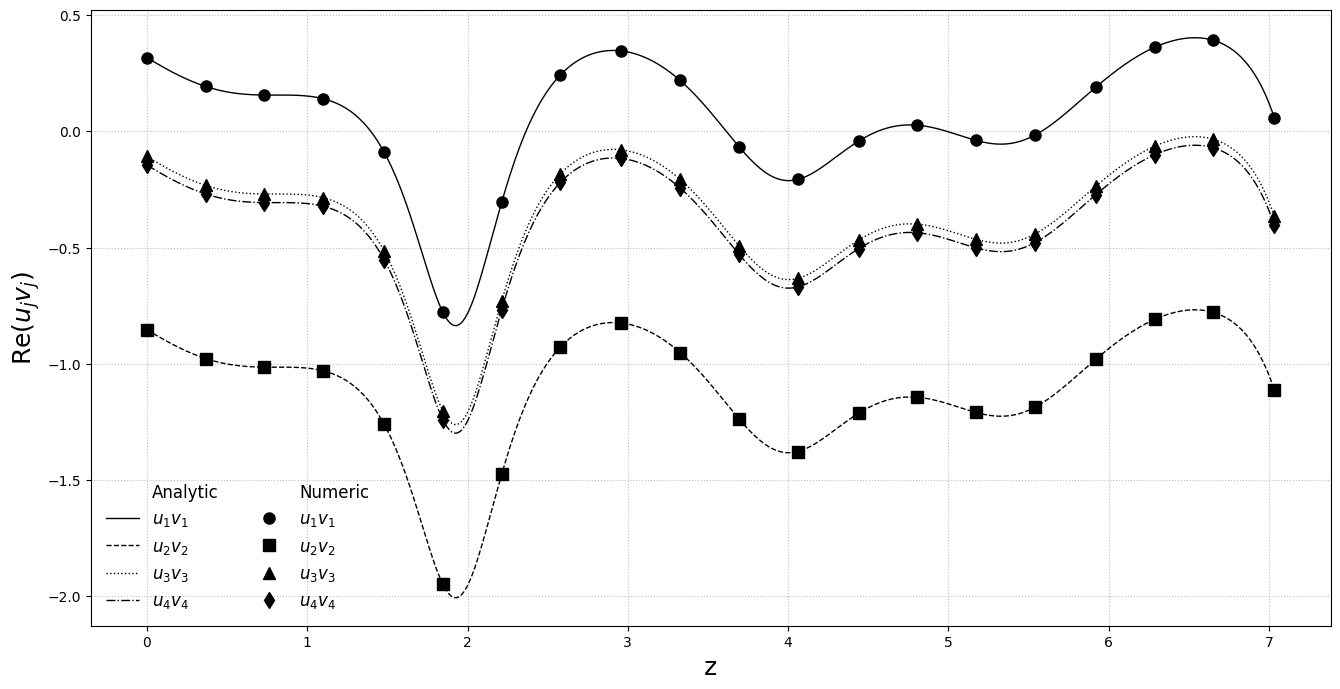

In [30]:
fig = plt.figure(figsize=(16, 8))


# Define markers for the numeric/scipy points
markers = ['o', 's', '^', 'd']  # circle, square, triangle, diamond
analytic_linestyles = ['-', '--', ':', '-.']   # solid, dashed, dotted, dash-dot

# Analytic plots (black, thin dashed)
case1_uv_ana_lines =[ 
    plt.plot(
        case1_z_eval[0:case1_ana_len],
        np.real(case1_uv_ana[_j]),
        linestyle=analytic_linestyles[_j],
        linewidth=1,
        color='black',
        label=f'$u_{_j+1} v_{_j+1}$'  # simplified, we'll handle grouping in legend
    )
    for _j in range(4)
]

# Numeric/scipy plots (black symbols, no lines, spaced out)
num_points = 20  # number of points to plot
indices = np.linspace(0, case1_scipy_len-1, num_points, dtype=int)
case1_uv_num_lines = [
    plt.plot(
        case1_z_eval[indices],
        np.real(case1_uv_nums[_j])[indices],
        linestyle='None',        # no line
        marker=markers[_j],
        markersize=8,            # slightly larger markers for visibility
        color='black',
        label=f'$u_{_j+1} v_{_j+1}$'  # simplified, handled in grouped legend
    )
    for _j in range(4)
]

# -------------------------
# Grouped legend
from matplotlib.lines import Line2D

legend_handles = []

# Analytic header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Analytic'))  # header placeholder
for _j, line in enumerate(case1_uv_ana_lines):
    legend_handles.append(Line2D([0], [0], color='black', lw=1, 
                                 linestyle=analytic_linestyles[_j], label=f'$u_{_j+1}v_{_j+1}$'))

# Numeric header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Numeric'))  # header placeholder
for _j, marker in enumerate(markers):
    legend_handles.append(Line2D([0], [0], linestyle='None', marker=marker, color='black', markersize=8,
                                 label=f'$u_{_j+1}v_{_j+1}$'))

case1_legend = plt.legend(handles=legend_handles, fontsize=12, ncol=2, frameon=False)

# Labels and grid (keeping your assignments)
case1_legend = plt.xlabel('z', fontsize=18)
case1_legend = plt.ylabel('$\mathrm{Re}(u_jv_j)$', fontsize=18)
case1_legend = plt.grid(True, linestyle=':', color='gray', alpha=0.5)
# plt.title('Real Parts Analytic vs Numeric Solutions (B&W)')
# plt.show()

plt.savefig('../latex-papers/fwm-paper/plots/case1_plot_1.pdf', dpi=300, bbox_inches='tight')

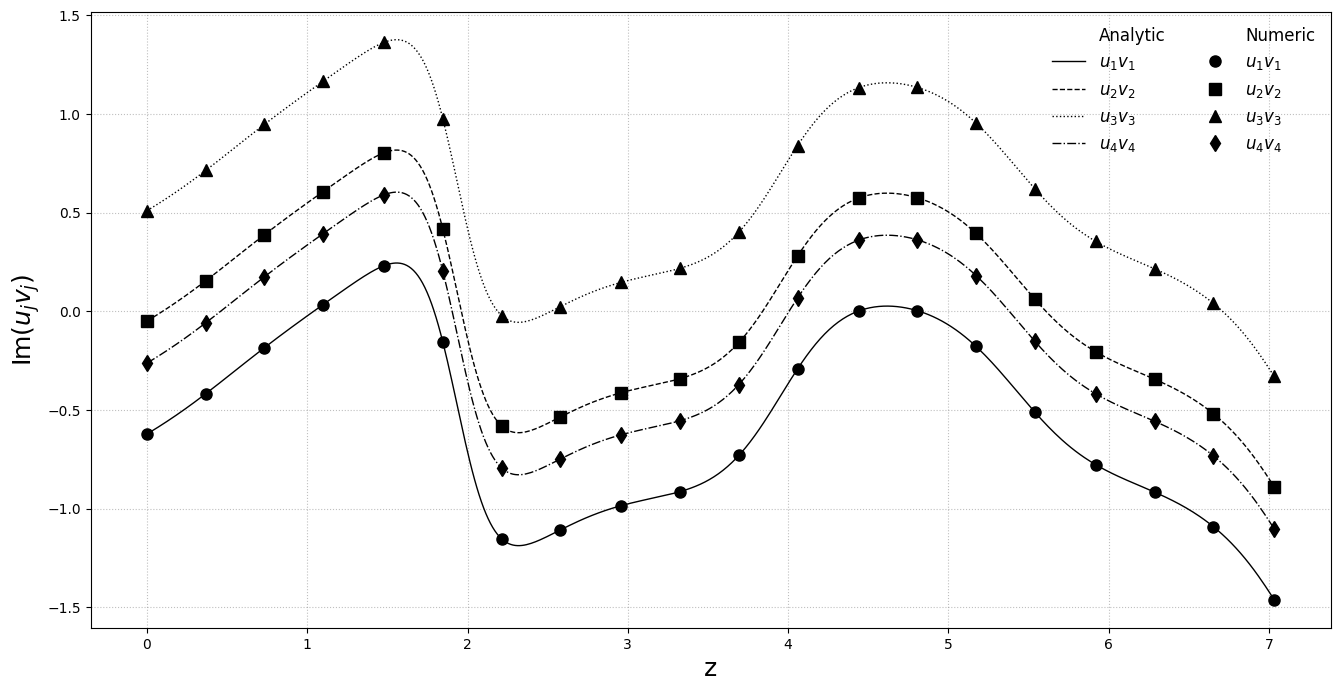

In [31]:
fig = plt.figure(figsize=(16, 8))


# Define markers for the numeric/scipy points
markers = ['o', 's', '^', 'd']  # circle, square, triangle, diamond
analytic_linestyles = ['-', '--', ':', '-.']   # solid, dashed, dotted, dash-dot

# Analytic plots (black, thin dashed)
case1_uv_ana_lines =[ 
    plt.plot(
        case1_z_eval[0:case1_ana_len],
        np.imag(case1_uv_ana[_j]),
        linestyle=analytic_linestyles[_j],
        linewidth=1,
        color='black',
        label=f'$u_{_j+1} v_{_j+1}$'  # simplified, we'll handle grouping in legend
    )
    for _j in range(4)
]

# Numeric/scipy plots (black symbols, no lines, spaced out)
num_points = 20  # number of points to plot
indices = np.linspace(0, case1_scipy_len-1, num_points, dtype=int)
case1_uv_num_lines = [
    plt.plot(
        case1_z_eval[indices],
        np.imag(case1_uv_nums[_j])[indices],
        linestyle='None',        # no line
        marker=markers[_j],
        markersize=8,            # slightly larger markers for visibility
        color='black',
        label=f'$u_{_j+1} v_{_j+1}$'  # simplified, handled in grouped legend
    )
    for _j in range(4)
]

# -------------------------
# Grouped legend
from matplotlib.lines import Line2D

legend_handles = []

# Analytic header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Analytic'))  # header placeholder
for _j, line in enumerate(case1_uv_ana_lines):
    legend_handles.append(Line2D([0], [0], color='black', lw=1, 
                                 linestyle=analytic_linestyles[_j], label=f'$u_{_j+1}v_{_j+1}$'))

# Numeric header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Numeric'))  # header placeholder
for _j, marker in enumerate(markers):
    legend_handles.append(Line2D([0], [0], linestyle='None', marker=marker, color='black', markersize=8,
                                 label=f'$u_{_j+1}v_{_j+1}$'))

case1_legend = plt.legend(handles=legend_handles, fontsize=12, ncol=2, frameon=False)

# Labels and grid (keeping your assignments)
case1_legend = plt.xlabel('z', fontsize=18)
case1_legend = plt.ylabel('$\mathrm{Im}(u_jv_j)$', fontsize=18)
case1_legend = plt.grid(True, linestyle=':', color='gray', alpha=0.5)
# plt.title('Real Parts Analytic vs Numeric Solutions (B&W)')
# plt.show()

plt.savefig('../latex-papers/fwm-paper/plots/case1_plot_2.pdf', dpi=300, bbox_inches='tight')

In [32]:
uv0_init_num_checks = [
    case1_uv_nums[_j][0] - (u(0,mu[_j + 1])*v(0,mu[_j + 1])).subs(case1_u_v_0_init_vals).simplify()
    for _j in range(4)
]
uv0_init_ana_checks = [
    case1_uv_ana[_j][0] - (u(0,mu[_j + 1])*v(0,mu[_j + 1])).subs(case1_u_v_0_init_vals).simplify()
    for _j in range(4)
]

uv0_init_num_checks
uv0_init_ana_checks

[0, 0, 0, 0]

[-1.11022302462516e-16 + 2.22044604925031e-16*I,
 1.11022302462516e-16 + 6.93889390390723e-18*I,
 -1.66533453693773e-16 + 2.22044604925031e-16*I,
 5.55111512312578e-17 + 1.11022302462516e-16*I]

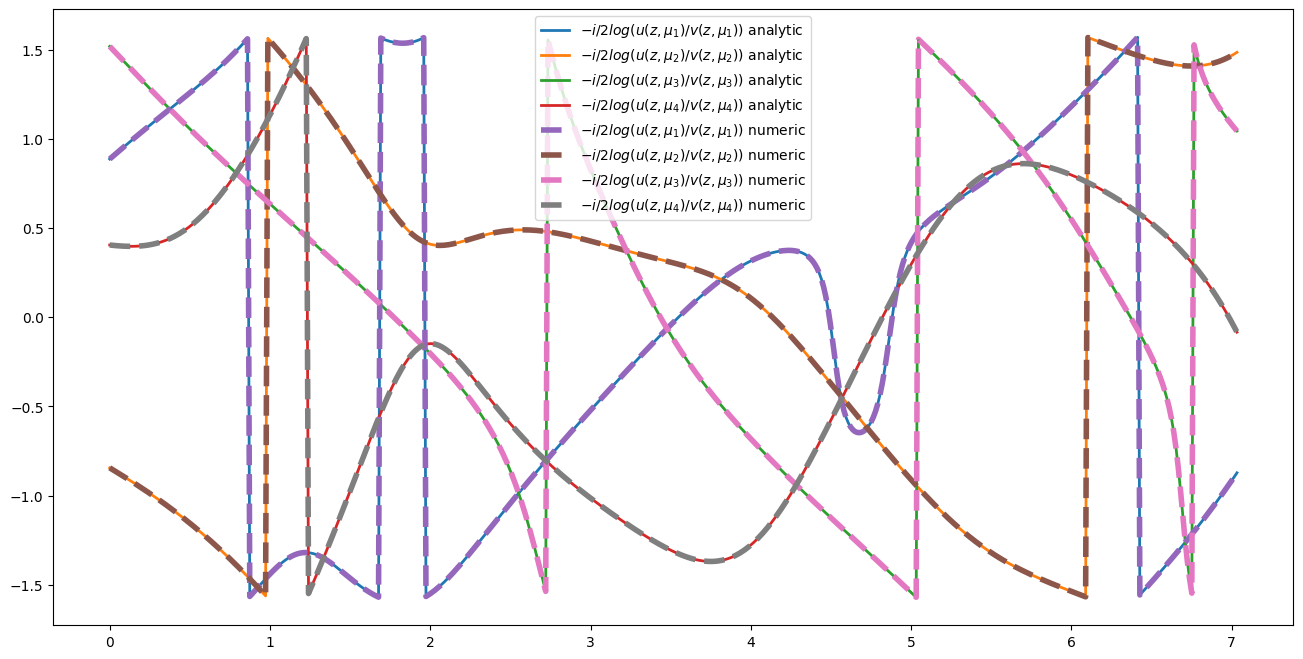

In [33]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case1_uv_ana_lines = [
    plt.plot(
        case1_z_eval[0: case1_ana_len], real(case1_phi_ana[_j]),
        linestyle="solid", linewidth=2, 
        label=f'$-i/2 log(u(z,\mu_{_j+1})/v(z,\mu_{_j+1}))$ analytic', #color='pink', 
    )
    for _j in range(4)
] 

# Numeric scipy plots
case1_uv_num_lines = [
    plt.plot(
        case1_z_eval[0: case1_scipy_len], real(case1_phi_nums[_j]),
        linestyle="dashed", linewidth=4, 
        label=f'$-i/2 log(u(z,\mu_{_j+1})/v(z,\mu_{_j+1}))$ numeric', #color='pink', 
    )
    for _j in range(4)
] 

case1_legend = plt.legend()

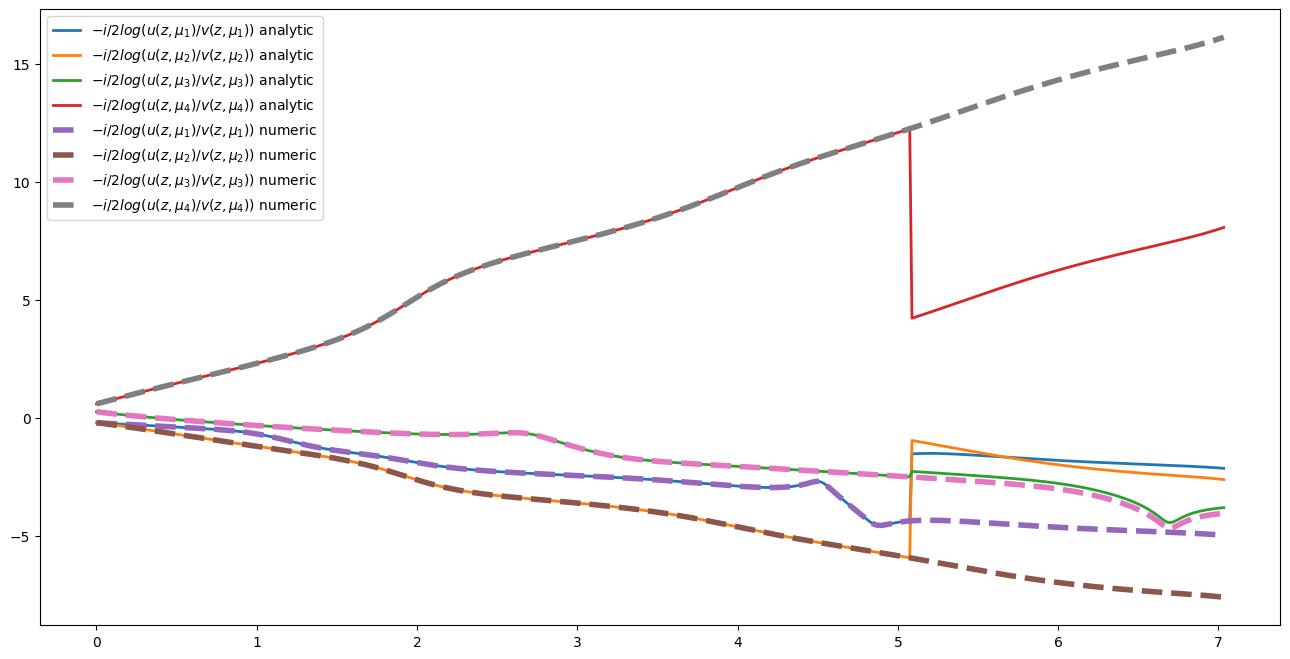

In [34]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case1_uv_ana_lines = [
    plt.plot(
        case1_z_eval[0: case1_ana_len], imag(case1_phi_ana[_j]),
        linestyle="solid", linewidth=2, label=f'$-i/2 log(u(z,\mu_{_j+1})/v(z,\mu_{_j+1}))$ analytic', #color='pink', 
    )
    for _j in range(4)
] 

# Numeric scipy plots
case1_uv_num_lines = [
    plt.plot(
        case1_z_eval[0: case1_scipy_len], imag(case1_phi_nums[_j]),
        linestyle="dashed", linewidth=4, label=f'$-i/2 log(u(z,\mu_{_j+1})/v(z,\mu_{_j+1}))$ numeric', #color='pink', 
    )
    for _j in range(4)
] 

case1_legend = plt.legend()

## Case 2: Four Wave Mixing

*Theory of Four-Wave Mixing, p371, Nonlinear Fiber Optics 4th Edition, Govind P. Agrawal*

The book references [this paper](https://ieeexplore.ieee.org/document/1071660) but it is not open access.

In [35]:
A_Ac_funcs = [A1(z), A2(z), A3(z), A4(z), Ac1(z), Ac2(z), Ac3(z), Ac4(z)]

dA1 = Eq(
    diff(A1(z),z), 
    I*n2*omega[1]/c*(
        (
            f[1,1]*A1(z)*Ac1(z) + 
            2*(f[1,2]*A2(z)*Ac2(z) + f[1,3]*A3(z)*Ac3(z) + f[1,4]*A4(z)*Ac4(z))
        )*A1(z) +
        2*f[1,2,3,4]*Ac2(z)*A3(z)*A4(z)*exp(I*Delta(k)*z)
    )
)
dA2 = Eq(
    diff(A2(z),z), 
    I*n2*omega[2]/c*(
        (
            f[2,2]*A2(z)*Ac2(z) + 
            2*(f[2,1]*A1(z)*Ac1(z) + f[2,3]*A3(z)*Ac3(z) + f[2,4]*A4(z)*Ac4(z))
        )*A2(z) +
        2*f[2,1,3,4]*Ac1(z)*A3(z)*A4(z)*exp(I*Delta(k)*z)
    )
)
dA3 = Eq(
    diff(A3(z),z), 
    I*n2*omega[3]/c*(
        (
            f[3,3]*A3(z)*Ac3(z) + 
            2*(f[3,1]*A1(z)*Ac1(z) + f[3,2]*A2(z)*Ac2(z) + f[3,4]*A4(z)*Ac4(z))
        )*A3(z) +
        2*f[3,4,1,2]*A1(z)*A2(z)*Ac4(z)*exp(-I*Delta(k)*z)
    )
)
dA4 = Eq(
    diff(A4(z),z), 
    I*n2*omega[4]/c*(
        (
            f[4,4]*A4(z)*Ac4(z) + 
            2*(f[4,1]*A1(z)*Ac1(z) + f[4,2]*A2(z)*Ac2(z) + f[4,3]*A3(z)*Ac3(z))
        )*A4(z) +
        2*f[4,3,1,2]*A1(z)*A2(z)*Ac3(z)*exp(-I*Delta(k)*z)
    )
)

dAc1 = Eq(
    diff(Ac1(z),z), 
    -I*n2*omega[1]/c*(
        (
            f[1,1]*A1(z)*Ac1(z) + 
            2*(f[1,2]*A2(z)*Ac2(z) + f[1,3]*A3(z)*Ac3(z) + f[1,4]*A4(z)*Ac4(z))
        )*Ac1(z) +
        2*conjugate(f[1,2,3,4])*A2(z)*Ac3(z)*Ac4(z)*exp(-I*Delta(k)*z)
    )
)
dAc2 = Eq(
    diff(Ac2(z),z), 
    -I*n2*omega[2]/c*(
        (
            f[2,2]*A2(z)*Ac2(z) + 
            2*(f[2,1]*A1(z)*Ac1(z) + f[2,3]*A3(z)*Ac3(z) + f[2,4]*A4(z)*Ac4(z))
        )*Ac2(z) +
        2*conjugate(f[2,1,3,4])*A1(z)*Ac3(z)*Ac4(z)*exp(-I*Delta(k)*z)
    )
)
dAc3 = Eq(
    diff(Ac3(z),z), 
    -I*n2*omega[3]/c*(
        (
            f[3,3]*A3(z)*Ac3(z) + 
            2*(f[3,1]*A1(z)*Ac1(z) + f[3,2]*A2(z)*Ac2(z) + f[3,4]*A4(z)*Ac4(z))
        )*Ac3(z) +
        2*conjugate(f[3,4,1,2])*Ac1(z)*Ac2(z)*A4(z)*exp(I*Delta(k)*z)
    )
)
dAc4 = Eq(
    diff(Ac4(z),z), 
    -I*n2*omega[4]/c*(
        (
            f[4,4]*A4(z)*Ac4(z) + 
            2*(f[4,1]*A1(z)*Ac1(z) + f[4,2]*A2(z)*Ac2(z) + f[4,3]*A3(z)*Ac3(z))
        )*Ac4(z) +
        2*conjugate(f[4,3,1,2])*Ac1(z)*Ac2(z)*A3(z)*exp(I*Delta(k)*z)
    )
)
wave_mixing_fs = [f[1,2,3,4], f[2,1,3,4], f[3,4,1,2], f[4,3,1,2]]

dAs = [dA1, dA2, dA3, dA4]
dAcs = [dAc1, dAc2, dAc3, dAc4]

delta_k = Eq(Delta(k), beta[3] + beta[4] - beta[1] - beta[2])
beta_4_delta_k_sub = [(beta[4], solve(delta_k, beta[4])[0])]
omega_k = Eq(omega[3] + omega[4], omega[1] + omega[2])
    
for _eq in dAs:
    _eq
    
delta_k
omega_k

Eq(Derivative(A1(z), z), I*n2*((A1(z)*Ac1(z)*f[1, 1] + 2*A2(z)*Ac2(z)*f[1, 2] + 2*A3(z)*Ac3(z)*f[1, 3] + 2*A4(z)*Ac4(z)*f[1, 4])*A1(z) + 2*A3(z)*A4(z)*Ac2(z)*exp(I*z*Delta(k))*f[1, 2, 3, 4])*omega[1]/c)

Eq(Derivative(A2(z), z), I*n2*((2*A1(z)*Ac1(z)*f[2, 1] + A2(z)*Ac2(z)*f[2, 2] + 2*A3(z)*Ac3(z)*f[2, 3] + 2*A4(z)*Ac4(z)*f[2, 4])*A2(z) + 2*A3(z)*A4(z)*Ac1(z)*exp(I*z*Delta(k))*f[2, 1, 3, 4])*omega[2]/c)

Eq(Derivative(A3(z), z), I*n2*((2*A1(z)*Ac1(z)*f[3, 1] + 2*A2(z)*Ac2(z)*f[3, 2] + A3(z)*Ac3(z)*f[3, 3] + 2*A4(z)*Ac4(z)*f[3, 4])*A3(z) + 2*A1(z)*A2(z)*Ac4(z)*exp(-I*z*Delta(k))*f[3, 4, 1, 2])*omega[3]/c)

Eq(Derivative(A4(z), z), I*n2*((2*A1(z)*Ac1(z)*f[4, 1] + 2*A2(z)*Ac2(z)*f[4, 2] + 2*A3(z)*Ac3(z)*f[4, 3] + A4(z)*Ac4(z)*f[4, 4])*A4(z) + 2*A1(z)*A2(z)*Ac3(z)*exp(-I*z*Delta(k))*f[4, 3, 1, 2])*omega[4]/c)

Eq(Delta(k), -beta[1] - beta[2] + beta[3] + beta[4])

Eq(omega[3] + omega[4], omega[1] + omega[2])

In [36]:
sj_vals = [(s(1), 1), (s(2), 1), (s(3), -1), (s(4), -1)]
a_j_beta = Eq(a[j], -I*s(j)*beta[j])
a_jk_f_omega = Eq(
    a[j, k],
    -(KroneckerDelta(j, k) - 2)*s(j)*s(k)*f[j, k]*omega[j]*omega[k]/
    (2*Abs(f[1, 2, 3, 4])*sqrt(Product(omega[k], (k, 1, 4))))
)
C_omega = Eq(C, sqrt(Product(omega[k], (k, 1, 4))))
T_f_C = Eq(T, sqrt(2)*sqrt(C)*sqrt(n2)*sqrt(Abs(f[1, 2, 3, 4]))/sqrt(c))
nu_f = Eq(exp(I*nu[1]), Abs(f[1, 2, 3, 4])/conjugate(f[1, 2, 3, 4]))

u_v_Ajs = [
    Eq(u(z, mu[1]), T*A1(z)*exp(-I*pi/4)*exp(-I*nu[1]/4)*exp(I*z*beta[1])/sqrt(omega[1])),
    Eq(u(z, mu[2]), T*A2(z)*exp(-I*pi/4)*exp(-I*nu[1]/4)*exp(I*z*beta[2])/sqrt(omega[2])),
    Eq(u(z, mu[3]), T*Ac3(z)*exp(I*pi/4)*exp(-I*nu[1]/4)*exp(-I*z*beta[3])/sqrt(omega[3])),
    Eq(u(z, mu[4]), T*Ac4(z)*exp(I*pi/4)*exp(-I*nu[1]/4)*exp(-I*z*beta[4])/sqrt(omega[4])),
    Eq(v(z, mu[1]), T*Ac1(z)*exp(-I*pi/4)*exp(I*nu[1]/4)*exp(-I*z*beta[1])/sqrt(omega[1])),
    Eq(v(z, mu[2]), T*Ac2(z)*exp(-I*pi/4)*exp(I*nu[1]/4)*exp(-I*z*beta[2])/sqrt(omega[2])),
    Eq(v(z, mu[3]), T*A3(z)*exp(I*pi/4)*exp(I*nu[1]/4)*exp(I*z*beta[3])/sqrt(omega[3])),
    Eq(v(z, mu[4]), T*A4(z)*exp(I*pi/4)*exp(I*nu[1]/4)*exp(I*z*beta[4])/sqrt(omega[4]))
]



for _args in sj_vals:
    Eq(*_args)

a_j_beta
a_jk_f_omega
C_omega
T_f_C
nu_f

for _eq in u_v_Ajs:
    _eq

Eq(s(1), 1)

Eq(s(2), 1)

Eq(s(3), -1)

Eq(s(4), -1)

Eq(a[j], -I*s(j)*beta[j])

Eq(a[j, k], (2 - KroneckerDelta(j, k))*s(j)*s(k)*f[j, k]*omega[j]*omega[k]/(2*Abs(f[1, 2, 3, 4])*sqrt(Product(omega[k], (k, 1, 4)))))

Eq(C, sqrt(Product(omega[k], (k, 1, 4))))

Eq(T, sqrt(2)*sqrt(C)*sqrt(n2)*sqrt(Abs(f[1, 2, 3, 4]))/sqrt(c))

Eq(exp(I*nu[1]), Abs(f[1, 2, 3, 4])/conjugate(f[1, 2, 3, 4]))

Eq(u(z, mu[1]), T*A1(z)*exp(-I*pi/4)*exp(-I*nu[1]/4)*exp(I*z*beta[1])/sqrt(omega[1]))

Eq(u(z, mu[2]), T*A2(z)*exp(-I*pi/4)*exp(-I*nu[1]/4)*exp(I*z*beta[2])/sqrt(omega[2]))

Eq(u(z, mu[3]), T*Ac3(z)*exp(I*pi/4)*exp(-I*nu[1]/4)*exp(-I*z*beta[3])/sqrt(omega[3]))

Eq(u(z, mu[4]), T*Ac4(z)*exp(I*pi/4)*exp(-I*nu[1]/4)*exp(-I*z*beta[4])/sqrt(omega[4]))

Eq(v(z, mu[1]), T*Ac1(z)*exp(-I*pi/4)*exp(I*nu[1]/4)*exp(-I*z*beta[1])/sqrt(omega[1]))

Eq(v(z, mu[2]), T*Ac2(z)*exp(-I*pi/4)*exp(I*nu[1]/4)*exp(-I*z*beta[2])/sqrt(omega[2]))

Eq(v(z, mu[3]), T*A3(z)*exp(I*pi/4)*exp(I*nu[1]/4)*exp(I*z*beta[3])/sqrt(omega[3]))

Eq(v(z, mu[4]), T*A4(z)*exp(I*pi/4)*exp(I*nu[1]/4)*exp(I*z*beta[4])/sqrt(omega[4]))

In [37]:
def generate_f_pm_matrix(size=4, diag_base=0.985, offdiag_base=0.85,
                         diag_var=0.005, offdiag_var=0.02, seed=None):
    """
    Generate a symmetric f[i,j] matrix for SPM/XPM overlaps.
    
    Parameters
    ----------
    size : int
        Number of modes (default 4)
    diag_base : float
        Base value for diagonal (SPM)
    offdiag_base : float
        Base value for off-diagonal (XPM)
    diag_var : float
        Maximum +/- variation for diagonal entries
    offdiag_var : float
        Maximum +/- variation for off-diagonal entries
    seed : int or None
        Random seed for reproducibility

    Returns
    -------
    f_pm : ndarray
        Symmetric size x size array of overlap factors
    """
    if seed is not None:
        np.random.seed(seed)
    
    f_pm = np.zeros((size, size))
    
    for i in range(size):
        for j in range(i, size):
            if i == j:
                # diagonal slightly below 1 with small variation
                f_pm[i, j] = diag_base + diag_var * (np.random.rand() - 0.5)
            else:
                # off-diagonal with variation
                f_pm[i, j] = offdiag_base + offdiag_var * (np.random.rand() - 0.5)
                f_pm[j, i] = f_pm[i, j]  # enforce symmetry
    
    return f_pm

In [38]:
# ----------------------------
# Constants
# ----------------------------
c_light = 299792458        # speed of light (m/s)
n2_nonlinear = 2.6e-20               # nonlinear index (m^2/W)
n_eff = 1.447              # effective index of fiber mode

# ----------------------------
# Wavelengths (meters)
# ----------------------------
lam_waves = np.array([1545e-9, 1555e-9, 1540e-9, 1560e-9])   # [λ1, λ2, λ3, λ4] (Comms)

# ----------------------------
# Angular frequencies (rad/s)
# ----------------------------
omega_freqs = 2 * np.pi * c_light / lam_waves
omega_freq_vals = [(omega[_j+1], omega_freqs[_j]) for _j in range(4)]

# ----------------------------
# Propagation constants β (1/m)
# ----------------------------
_nl_length_fac_1 = 1e-8
# _nl_length_fac_1 = 1
beta_props = _nl_length_fac_1 * 2 * np.pi * n_eff / lam_waves
mean_beta_prop = np.mean(beta_props) # Subtract the mean to ignore the rapid phase velocity
beta_prop_vals = [(beta[_j+1], beta_props[_j] - mean_beta_prop) for _j in range(4)]

# ----------------------------
# Overlap integrals (single-mode test)
# ----------------------------
# Four-wave mixing overlaps
f_1234 = 0.93 * np.exp(1j * 0.014 * np.pi)
f_wv_mix_overlap_vals = [
    (f[1,2,3,4], f_1234),
    (f[2,1,3,4], f_1234),
    (f[3,4,1,2], conjugate(f_1234)),
    (f[4,3,1,2], conjugate(f_1234))
]

# Phase modulation overlaps f[i,j]
# f_pm = np.ones((4,4))   # all = 1 (SPM and XPM identical)
f_pm_matrix = generate_f_pm_matrix()
f_pm_overlap_vals = [(f[_i + 1, _j + 1], f_pm_matrix[_i, _j]) for _i in range(4) for _j in range(4)]

# ----------------------------
# Initial envelopes A_i(0)
# ----------------------------
# A_i are complex field envelopes with |A|^2 = power in watts
# _nl_length_fac_2 = 1
_nl_length_fac_2 = 1 / _nl_length_fac_1 ** 2
P_freq_inits = _nl_length_fac_2 * np.array([0.100, 0.850, 0.04, 0.001])  # powers [W]
phi_freq_inits = np.array([0.023, 0.65, 0.62, 1.95])      # phases [rad]
A0_freq_envs = np.sqrt(P_freq_inits) * np.exp(1j * phi_freq_inits)
A_funcs = [A1(z), A2(z), A3(z), A4(z)]
Ac_funcs = [Ac1(z), Ac2(z), Ac3(z), Ac4(z)]
A_init_vals = [(A_funcs[_j].subs(z,0), A0_freq_envs[_j]) for _j in range(4)]
Ac_init_vals = [(Ac_funcs[_j].subs(z,0), conjugate(A0_freq_envs[_j])) for _j in range(4)]
case2_A_Ac_init_vals = A_init_vals + Ac_init_vals

# -------------------------------
# Initial u, v and  a[j], a[j,k]
# -------------------------------
# Get interim constants T, C, nu[1]
case2_T_f_C_num = T_f_C.subs([
    C_omega.doit().subs(omega_freq_vals).args,
    (c, c_light),
    (n2, n2_nonlinear),
    (f[1,2,3,4], f_1234)
])
case2_T_f_C_num = Eq(case2_T_f_C_num.lhs, case2_T_f_C_num.rhs.evalf())
case2_nu_1_num = Eq(nu[1], angle(f_1234))

# Combine all params for the FWM case
case2_fwm_params = (
    sj_vals + 
    f_wv_mix_overlap_vals +
    f_pm_overlap_vals +
    omega_freq_vals +
    beta_prop_vals +
    [
        (c, c_light), 
        (n2, n2_nonlinear), 
        delta_k.subs(beta_prop_vals).args,
        case2_T_f_C_num.args,
        case2_nu_1_num.args,
        (pi, np.pi),
        (I, 1j)
    ]
)

# Get a[j], a[j,k]
case2_a_j_vals_from_beta = [
    a_j_beta.subs(j,_j+1).subs(case2_fwm_params).args
    for _j in range(4)
]
case2_a_jk_vals_from_omega_f = [
    a_jk_f_omega
    .doit()
    .subs([(j,_j + 1),(k,_k + 1)])
    .subs(case2_fwm_params)
    .args
    for _j in range(4) for _k in range(4)
]
case2_a_params = case2_a_j_vals_from_beta + case2_a_jk_vals_from_omega_f

# Get norm constants for converting u,v to A, Ac
case2_A_u_v_dict = solve(u_v_Ajs, A_Ac_funcs)
case2_Aj_uj_vj_s = [Eq(_a, case2_A_u_v_dict[_a]) for _a in A_Ac_funcs]
case2_u_v_0_to_one = [(u(0, mu[_j]),1) for _j in range(1,5)] + [(v(0, mu[_j]),1) for _j in range(1,5)]

case2_u_v_norms_to_A = [
    complex(
        _eq.rhs.subs(z,0).subs(case2_u_v_0_to_one + case2_fwm_params)
        .expand()
        .simplify()
    )
    for _eq in case2_Aj_uj_vj_s
]

# Get init. values for u,v from init values for As
case2_u_v_0_init_vals = [
    _eq.subs(z,0)
    .subs(case2_fwm_params)
    .subs(case2_A_Ac_init_vals)
    .expand()
    .simplify()
    for _eq in u_v_Ajs
]
case2_u_v_0_init_vals = [(_eq.lhs, _eq.rhs.evalf()) for _eq in case2_u_v_0_init_vals]

In [39]:
# Derive intermediate params, invariants, and Weierstrass p values
case2_init_cons_params = get_init_cons_params(
    u_v_0_init_vals=case2_u_v_0_init_vals,
    a_params=case2_a_params
)

for _eq_args in case2_u_v_0_init_vals:
    Eq(*_eq_args)
    
for _eq_args in case2_a_params:
    Eq(*_eq_args)

for _eq in case2_init_cons_params['params']:
    _eq
    
for _eq in case2_init_cons_params['invariants']:
    _eq
    
for _eq in case2_init_cons_params['weierstrass_z0']:
    _eq
    
for _eq in case2_init_cons_params['weierstrass_z1']:
    _eq
    
for _eq in case2_init_cons_params['weierstrass_mu_j']:
    _eq
    
for _eq in case2_init_cons_params['weierstrass_prime_mu_j']:
    _eq

Eq(u(0, mu[1]), 10.002478843506 - 9.7651681937136*I)

Eq(u(0, mu[2]), 40.4493235158806 - 5.96419512776688*I)

Eq(u(0, mu[3]), 8.72167423666234 + 1.35745357049118*I)

Eq(u(0, mu[4]), 0.5407802063769 - 1.29638318276486*I)

Eq(v(0, mu[1]), 9.7651681937136 - 10.002478843506*I)

Eq(v(0, mu[2]), 5.96419512776688 - 40.4493235158806*I)

Eq(v(0, mu[3]), 1.35745357049118 + 8.72167423666234*I)

Eq(v(0, mu[4]), -1.29638318276486 + 0.5407802063769*I)

Eq(a[1], -0.000188301124402587*I)

Eq(a[2], 0.000190132330242676*I)

Eq(a[3], 0.00037936087179654*I)

Eq(a[4], -0.000377529665956444*I)

Eq(a[1, 1], 0.532689778961056)

Eq(a[1, 2], 0.904873824630755)

Eq(a[1, 3], -0.923166140432807)

Eq(a[1, 4], -0.910550257605497)

Eq(a[2, 1], 0.904873824630755)

Eq(a[2, 2], 0.526413440846113)

Eq(a[2, 3], -0.926345001090463)

Eq(a[2, 4], -0.905159029668651)

Eq(a[3, 1], -0.923166140432807)

Eq(a[3, 2], -0.926345001090463)

Eq(a[3, 3], 0.53627517440587)

Eq(a[3, 4], 0.917986134053201)

Eq(a[4, 1], -0.910550257605497)

Eq(a[4, 2], -0.905159029668651)

Eq(a[4, 3], 0.917986134053201)

Eq(a[4, 4], 0.521904976382112)

Eq(b[0], -168102.645420968 - 3.55527783704939e-12*I)

Eq(b[1], 1.26495399443684e-15 - 14.5776514790389*I)

Eq(b[2], -0.783718784815887)

Eq(c[0], -72517049308.6093 - 2.49536503082758e-5*I)

Eq(c[1], 1.33096299312286e-7 - 529034139.499507*I)

Eq(c[2], 1020171.77531703 + 1.6765119440075e-10*I)

Eq(c[3], 0)

Eq(c[4], 1)

Eq(d[0], 318326696631.965 + 0.000101009904452332*I)

Eq(d[1], -5.32914136677183e-7 + 2121037641.55333*I)

Eq(d[2], -3817409.20720345 - 6.65068981667666e-10*I)

Eq(d[3], -1.98273641473609e-15 + 22.8495586052437*I)

Eq(d[4], -3.38578486632671)

Eq(gamma[1], -2.62290189567693e-14 + 251.402945885221*I)

Eq(gamma[2], 1.01668673480049e-13 - 1224.90835766293*I)

Eq(gamma[3], -3.51108031537706e-14 + 524.72132043802*I)

Eq(gamma[4], -4.03288513695088e-14 + 448.784091339685*I)

Eq(Lambda[0, 1], -1.58070506174057e-13 + 1973.31677658184*I)

Eq(Lambda[0, 2], -5.96071968726153e-14 + 836.911013730989*I)

Eq(Lambda[0, 3], 1.11425928704392e-13 - 1383.06821314557*I)

Eq(Lambda[0, 4], 1.04986820347844e-13 - 1412.58192568822*I)

Eq(Lambda[1, 1], -0.00429340203855014)

Eq(Lambda[1, 2], -0.00835737287430274)

Eq(Lambda[1, 3], -0.00339044065625507)

Eq(Lambda[1, 4], 0.0160412155691081)

Eq(a[0], 1176016.78108529 + 2.00998329091817e-10*I)

Eq(lambda[1], -5.95190145985745e-14 + 553.115134539011*I)

Eq(g2, 148714902739.51 + 8.52378476717397e-5*I)

Eq(g3, -4.86402253658446e+15 - 4.73655492605686*I)

Eq(wp(z0, g2, g3), -200512.393402129 - 5.26542734994997e-11*I)

Eq(\wp'(z0, g2, g3), -49362173.124024 - 9.30015326360247e-9*I)

Eq(wp(z1, g2, g3), 196640.292321241 + 5.54263945512151e-11*I)

Eq(\wp'(z1, g2, g3), 77685002.0054048 + 3.50837773521518e-8*I)

Eq(wp(-z0 + mu[1], g2, g3), 56709.0640411605 + 7.67081717720538e-12*I)

Eq(wp(-z0 + mu[2], g2, g3), 172895.410810642 + 4.68554351336501e-11*I)

Eq(wp(-z0 + mu[3], g2, g3), -1290266.57391489 + 6.62107391299963e-10*I)

Eq(wp(-z0 + mu[4], g2, g3), -208023.131437845 - 5.28941229880732e-11*I)

Eq(\wp'(-z0 + mu[1], g2, g3), 8.83767167552216e-9 - 53291402.8723271*I)

Eq(\wp'(-z0 + mu[2], g2, g3), -6.09235579408954e-9 + 13220210.2793968*I)

Eq(\wp'(-z0 + mu[3], g2, g3), 2.28535052421576e-6 + 2897470358.32043*I)

Eq(\wp'(-z0 + mu[4], g2, g3), -9.95193874609879e-8 - 14404726.3754874*I)

In [40]:
case2_lattice_and_weierstrass_args = get_lattice_and_weierstrass_args(
    init_cons_params=case2_init_cons_params,
    _wp_tolerance = 1e-5,
    _wpp_tolerance = 1e-4
)

case2_lattice_and_weierstrass_args["z0"]
case2_lattice_and_weierstrass_args["z1"]
for _eq in case2_lattice_and_weierstrass_args["omegas"]:
    _eq
for _eq in case2_lattice_and_weierstrass_args["mujs"]:
    _eq

Eq(z0, -0.00027709977454084 - 0.00284329959579272*I)

Eq(z1, -0.00258515926138644 - 3.3256210780526e-17*I)

Eq(omega[1], 0.00321775982359125 - 4.85666119217456e-17*I)

Eq(omega[2], 0.00321775982359128 + 0.00284329959579258*I)

Eq(omega[3], 3.29779341358694e-17 + 0.00284329959579262*I)

Eq(mu[1], -0.0034948595981321 - 0.00485063129464457*I)

Eq(mu[2], 0.00294066004905004 - 0.00271874851196854*I)

Eq(mu[3], -0.00671261942172333 - 0.00372568051650631*I)

Eq(mu[4], -0.000277099774541211 - 0.00576473725163832*I)

In [41]:
checks( 
    u_v_0_init_vals=case2_u_v_0_init_vals,
    init_cons_params=case2_init_cons_params,
    lattice_and_weierstrass_args=case2_lattice_and_weierstrass_args,
    unity_check_tolerance=1e-9
)

Unity checks passed


In [42]:
case2_epsilon_offsets = get_epsilon_offsets(
    u_v_0_init_vals=case2_u_v_0_init_vals,
    init_cons_params=case2_init_cons_params,
    lattice_and_weierstrass_args=case2_lattice_and_weierstrass_args,
    ratio_test_tolerance=1e-10
)

# for _eq in case2_epsilon_offsets['epsilon_j_u0_vals']:
#     _eq
    
# for _eq in case2_epsilon_offsets['epsilon_j_v0_vals']:
#     _eq

In [43]:
# Setup z array to evaluate over based on multiple periods (multiples of 2*omega1)
case2_show_n_periods = 2
case2_z_end = abs(case2_show_n_periods * 2 * complex(case2_lattice_and_weierstrass_args["omegas"][0].rhs))
case2_n_points_z = 1000
case2_z_eval = linspace(0, case2_z_end, case2_n_points_z)

# For forcing to real
real_tolerance = 1e5

In [44]:
case2_A_prime_vec = [_eq.rhs.subs(case2_fwm_params).expand() for _eq in dAs + dAcs]
case2_A_symbs = [Symbol(f'_A{_j + 1}_symb') for _j in range(4)]
case2_Ac_symbs = [Symbol(f'_Ac{_j + 1}_symb') for _j in range(4)]
case2_symb_subs = [(A_Ac_funcs[_j], _s) for _j, _s in enumerate(case2_A_symbs + case2_Ac_symbs)]


case2_A_prime_symb = [_eq.subs(case2_symb_subs) for _eq in case2_A_prime_vec]
case_2_A_f_ = lambdify((z, (*case2_A_symbs, *case2_Ac_symbs)), case2_A_prime_symb)
case2_init_A_numeric_only = [float(re(x[1])) + float(im(x[1])) * 1j for x in case2_A_Ac_init_vals]

case2_A_solution = scipy.integrate.solve_ivp(
    case_2_A_f_, 
    (0, case2_z_end), 
    case2_init_A_numeric_only, 
    method='DOP853',        # 8th order method (more accurate than default RK45)
    t_eval=case2_z_eval,
    rtol=1e-11,             # Relative tolerance (default is 1e-3)
    atol=1e-13,             # Absolute tolerance (default is 1e-6)
    max_step=0.05,           # Limit step size (adjust based on z_end scale)
    dense_output=True
)

case2_A_sol_scipy = case2_A_solution.y

case2_abs_A_num = [
    real_if_close(
        case2_A_sol_scipy[_j]*case2_A_sol_scipy[_j + 4]
        , 
        tol=real_tolerance
    )
    for _j in range(4)
]
case2_phi_A_num = [
    real_if_close(
        -1.0j/2.0*np_log(
            case2_A_sol_scipy[_j]/case2_A_sol_scipy[_j + 4]
        ), 
        tol=real_tolerance
    )
    for _j in range(4)
]

case2_scipy_len = len(case2_abs_A_num[0])

In [45]:
# Checks that the numeric solution started with the correct values
case2_abs_0_tolerance = 1e-14
case2_phi_0_tolerance = 1e-14
case2_avoid_div_0 = 1e-20

case2_init_num_abs_vals_checks = [
    2 * abs(
        (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify() - 
        case2_abs_A_num[_j][0]
    ) / (abs(
        (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify() +
        case2_abs_A_num[_j][0]
    ) + case2_avoid_div_0) > case2_abs_0_tolerance
    for _j in range(4)
]
for _j, _ch in enumerate(case2_init_num_abs_vals_checks):
    if _ch:
        (
            (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify(), 
            case2_abs_A_num[_j][0]
        )
        raise ValueError('case2_init_num_abs_vals_checks failed')
    

case2_init_num_phi_vals_checks = [
    2 * abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case2_A_Ac_init_vals[_j][1]/case2_A_Ac_init_vals[_j+4][1]).expand().simplify())
            )
        ) - case2_phi_A_num[_j][0]
    ) / (abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case2_A_Ac_init_vals[_j][1]/case2_A_Ac_init_vals[_j+4][1]).expand().simplify())
            )
        ) + case2_phi_A_num[_j][0]
    ) + case2_avoid_div_0) > case2_phi_0_tolerance
    for _j in range(4)
]
if any(case2_init_num_phi_vals_checks):
    print()
    raise ValueError('case2_init_num_phi_vals_checks failed')

In [46]:
case2_kron_sol_mpmath = get_numeric_eval_of_analytic_solution_u_v(
    u_v_0_init_vals=case2_u_v_0_init_vals,
    a_params=case2_a_params,
    init_cons_params=case2_init_cons_params,
    lattice_and_weierstrass_args=case2_lattice_and_weierstrass_args,
    epsilon_offsets=case2_epsilon_offsets,
    z_eval_vec=case2_z_eval
)

case2_abs_A_ana = [
    real_if_close(
        case2_kron_sol_mpmath['u_j_evals'][_j]*case2_u_v_norms_to_A[_j]*
        case2_kron_sol_mpmath['v_j_evals'][_j]*case2_u_v_norms_to_A[_j + 4], 
        tol=real_tolerance
    )
    for _j in range(4)
]
case2_phi_A_ana = [
    real_if_close(
        -1.0j/2.0*np_log(
            case2_kron_sol_mpmath['u_j_evals'][_j]*case2_u_v_norms_to_A[_j]/
            (case2_kron_sol_mpmath['v_j_evals'][_j]*case2_u_v_norms_to_A[_j + 4])
        ), 
        tol=real_tolerance
    )
    for _j in range(4)
]
case2_phi_A_ana = [
    case2_phi_A_ana[0],
    case2_phi_A_ana[1],
    -case2_phi_A_ana[2], # Correction because u3/v3 gives Ac3/A3 not A3/Ac3
    -case2_phi_A_ana[3]  # Correction because u4/v4 gives Ac4/A4 not A4/Ac4
]
case2_ana_len = len(case2_abs_A_ana[0])

In [47]:
# Checks that the analytic solution started with the correct values

# The analytic solutions seems to give init phases for A3, A4 as slightly off
# Setting lower tolerance for now as everything looks ok when plotted
case2_phi_ana_tolerance = 1e-2

case2_init_ana_abs_vals_checks = [
    2 * abs(
        (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify() - 
        case2_abs_A_ana[_j][0]
    ) / (abs(
        (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify() +
        case2_abs_A_ana[_j][0]
    ) + case2_avoid_div_0)
    for _j in range(4)
]
for _j, _ch_val in enumerate(case2_init_ana_abs_vals_checks):
    if _ch_val > case2_abs_0_tolerance:
        print(_ch_val)
        (
            (case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify(), 
            case2_abs_A_ana[_j][0]
        )
        raise ValueError('case2_init_ana_abs_vals_checks failed')
    
case2_init_ana_phi_vals_checks = [
    2 * abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case2_A_Ac_init_vals[_j][1]/case2_A_Ac_init_vals[_j+4][1]).expand().simplify())
            )
        ) - case2_phi_A_ana[_j][0]
    ) / (abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case2_A_Ac_init_vals[_j][1]*case2_A_Ac_init_vals[_j+4][1]).expand().simplify())
            )
        ) + case2_phi_A_ana[_j][0]
    ) + case2_avoid_div_0)
    for _j in range(4)
]
for _j, _ch_val in enumerate(case2_init_ana_phi_vals_checks):
    if _ch_val > case2_phi_ana_tolerance:
        print(_ch_val)
        (
            real_if_close(
                -1.0j/2.0*np_log(
                    complex((case2_A_Ac_init_vals[_j][1]/case2_A_Ac_init_vals[_j+4][1]).expand().simplify())
                )
            ), 
            case2_phi_A_ana[_j][0]
        )
        raise ValueError(f'case2_init_ana_phi_vals_checks[{_j}] failed')

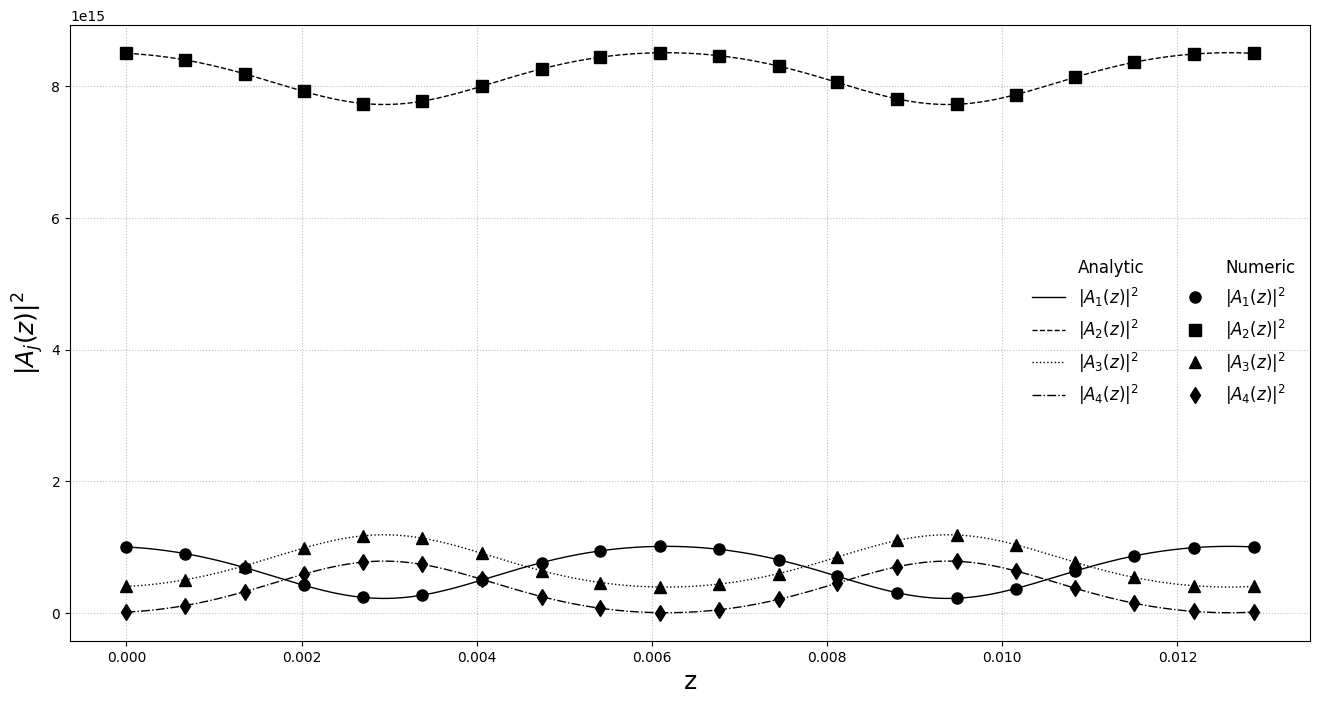

In [48]:
# fig = plt.figure(figsize=(16, 8))

# # Analytic plots
# case2_uv_ana_lines = [
#     plt.plot(
#         case2_z_eval[0: case2_ana_len], real(case2_abs_A_ana[_j]),
#         linestyle="solid", linewidth=2, label=f'$|A_{_j+1}(z)|^2$ analytic', #color='pink', 
#     )
#     for _j in range(4)
# ]

# # Numeric scipy plots
# case2_uv_num_lines = [
#     plt.plot(
#         case2_z_eval[0: case2_scipy_len], real(case2_abs_A_num[_j]),
#         linestyle="dashed", linewidth=4, label=f'$|A_{_j+1}(z)|^2$ numeric', #color='pink', 
#     )
#     for _j in range(4)
# ] 

# case2_legend = plt.legend()

fig = plt.figure(figsize=(16, 8))

# ---------------------------------------------------------
# Define markers for the numeric/scipy points
markers = ['o', 's', '^', 'd']  # circle, square, triangle, diamond
analytic_linestyles = ['-', '--', ':', '-.']   # solid, dashed, dotted, dash-dot

# ---------------------------------------------------------
# Analytic plots (black, thin dashed)
case2_uv_ana_lines = [
    plt.plot(
        case2_z_eval[0:case2_ana_len],
        np.real(case2_abs_A_ana[_j]),
        linestyle=analytic_linestyles[_j],
        linewidth=1,
        color='black',
        label=f'$|A_{_j+1}(z)|^2$'   # simplified (group legend handles labels)
    )
    for _j in range(4)
]

# ---------------------------------------------------------
# Numeric/scipy plots (black markers only, spaced)
num_points = 20
indices = np.linspace(0, case2_scipy_len - 1, num_points, dtype=int)

case2_uv_num_lines = [
    plt.plot(
        case2_z_eval[indices],
        np.real(case2_abs_A_num[_j])[indices],
        linestyle='None',        # NO line
        marker=markers[_j],
        markersize=8,
        color='black',
        label=f'$|A_{_j+1}(z)|^2$'  # simplified for grouped legend
    )
    for _j in range(4)
]

# ---------------------------------------------------------
# Grouped legend
from matplotlib.lines import Line2D

legend_handles = []

# Analytic header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Analytic'))

# Analytic entries (dashed black lines)
for _j in range(4):
    legend_handles.append(
        Line2D([0], [0],
               color='black',
               linestyle=analytic_linestyles[_j],
               linewidth=1,
               label=f'$|A_{_j+1}(z)|^2$')
    )

# Numeric header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Numeric'))

# Numeric entries (markers only)
for _j, marker in enumerate(markers):
    legend_handles.append(
        Line2D([0], [0],
               linestyle='None',
               marker=marker,
               color='black',
               markersize=8,
               label=f'$|A_{_j+1}(z)|^2$')
    )

case2_legend = plt.legend(handles=legend_handles, fontsize=12, ncol=2, frameon=False)

# ---------------------------------------------------------
# Axis labels + grid (keeping your assignment pattern)
case2_legend = plt.xlabel('z', fontsize=18)
case2_legend = plt.ylabel(r'$|A_j(z)|^2$', fontsize=18)
case2_legend = plt.grid(True, linestyle=':', color='gray', alpha=0.5)

# plt.title('Case 2: Analytic vs Numeric for |A_j|^2 (B&W)')
# plt.show()

plt.savefig('../latex-papers/fwm-paper/plots/case2_plot_1.pdf', dpi=300, bbox_inches="tight")

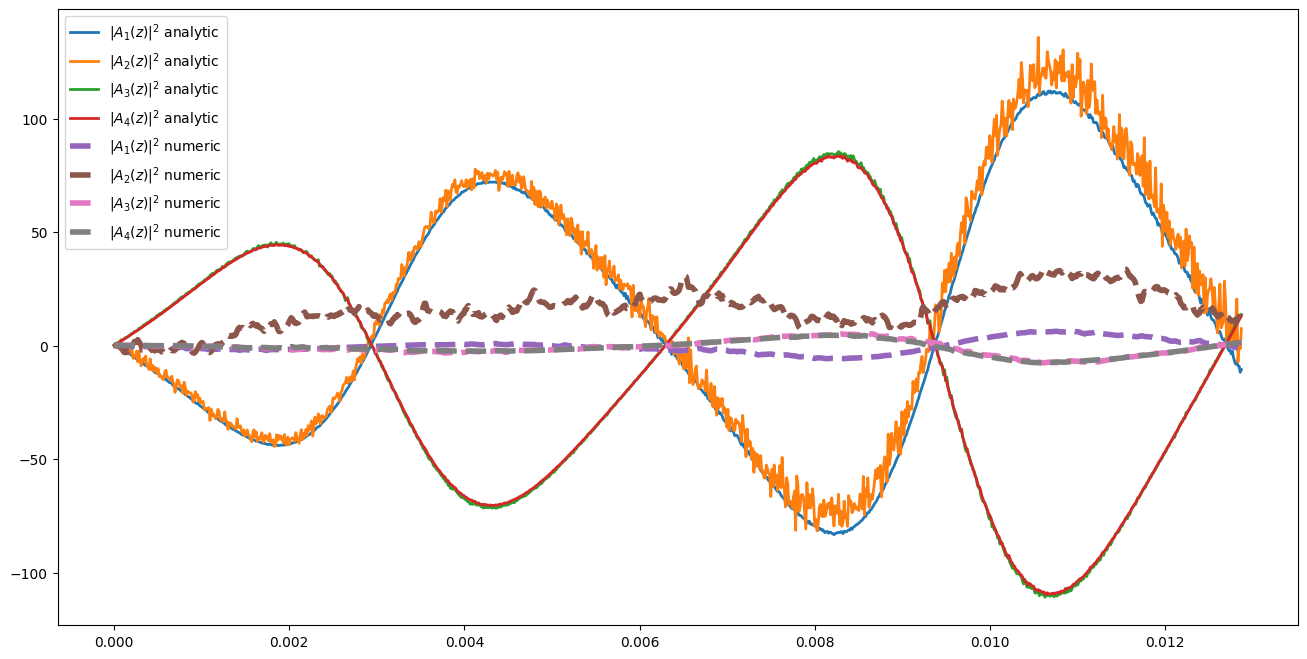

In [49]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case2_uv_ana_lines = [
    plt.plot(
        case2_z_eval[0: case2_ana_len], imag(case2_abs_A_ana[_j]),
        linestyle="solid", linewidth=2, label=f'$|A_{_j+1}(z)|^2$ analytic', #color='pink', 
    )
    for _j in range(4)
]

# Numeric scipy plots
case2_uv_num_lines = [
    plt.plot(
        case2_z_eval[0: case2_scipy_len], imag(case2_abs_A_num[_j]),
        linestyle="dashed", linewidth=4, label=f'$|A_{_j+1}(z)|^2$ numeric', #color='pink', 
    )
    for _j in range(4)
] 

case2_legend = plt.legend()

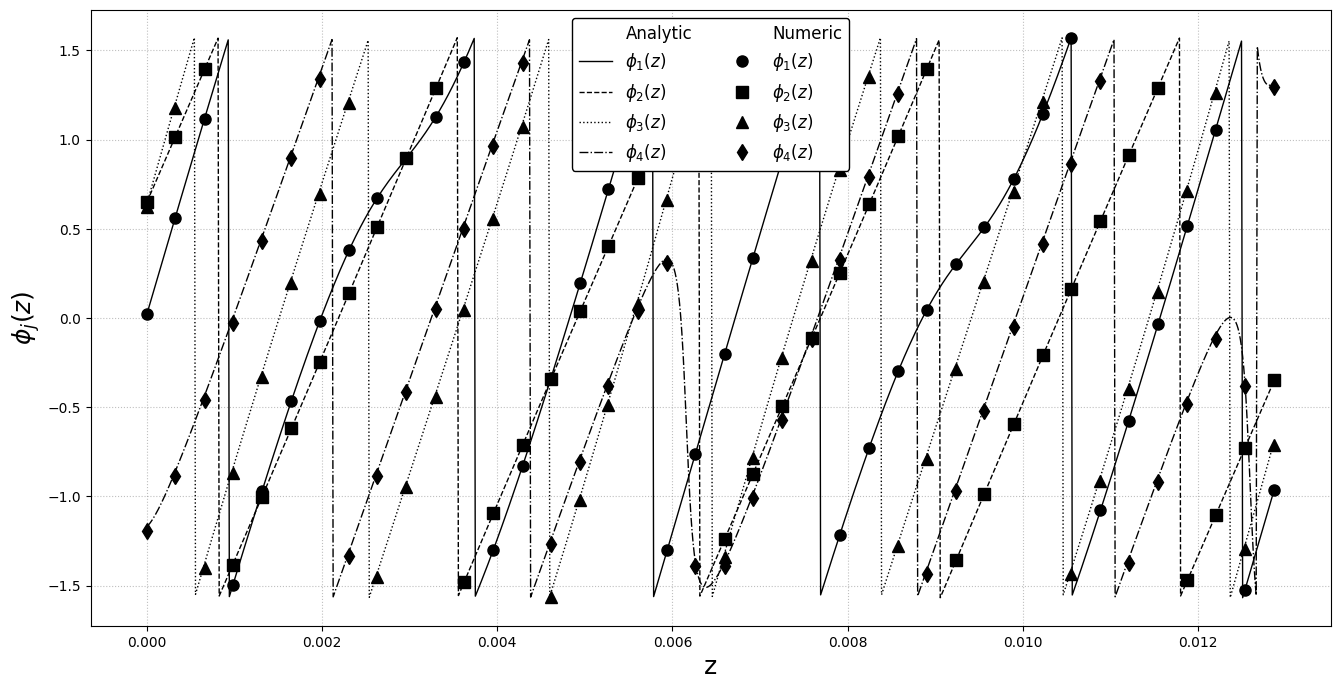

In [50]:
fig = plt.figure(figsize=(16, 8))

# ---------------------------------------------------------
# Define markers for the numeric/scipy points
markers = ['o', 's', '^', 'd']  # circle, square, triangle, diamond
analytic_linestyles = ['-', '--', ':', '-.']   # solid, dashed, dotted, dash-dot

# ---------------------------------------------------------
# Analytic plots (black, thin dashed)
case2_uv_ana_lines = [
    plt.plot(
        case2_z_eval[0:case2_ana_len],
        np.real(case2_phi_A_ana[_j]),
        linestyle=analytic_linestyles[_j],          # thin dashed
        linewidth=1,
        color='black',
        label=fr'$\phi_{{{_j+1}}}(z)$'   # simplified (legend handles grouping)
    )
    for _j in range(4)
]

# ---------------------------------------------------------
# Numeric/scipy plots (black markers only, spaced)
num_points = 40
indices = np.linspace(0, case2_scipy_len - 1, num_points, dtype=int)

case2_uv_num_lines = [
    plt.plot(
        case2_z_eval[indices],
        np.real(case2_phi_A_num[_j])[indices],
        linestyle='None',        # markers only
        marker=markers[_j],
        markersize=8,
        color='black',
        label=fr'$\phi_{{{_j+1}}}(z)$'
    )
    for _j in range(4)
]

# ---------------------------------------------------------
# Grouped legend
from matplotlib.lines import Line2D

legend_handles = []

# Analytic header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Analytic'))

# Analytic dashed lines
for _j in range(4):
    legend_handles.append(
        Line2D([0], [0],
               color='black',
               linestyle=analytic_linestyles[_j],
               linewidth=1,
               label=fr'$\phi_{{{_j+1}}}(z)$')
    )

# Numeric header
legend_handles.append(Line2D([0], [0], color='white', linestyle='None', label='Numeric'))

# Numeric markers only
for _j, marker in enumerate(markers):
    legend_handles.append(
        Line2D([0], [0],
               linestyle='None',
               marker=marker,
               color='black',
               markersize=8,
               label=fr'$\phi_{{{_j+1}}}(z)$')
    )

case2_legend = plt.legend(
    handles=legend_handles, fontsize=12, ncol=2, frameon=True, facecolor='white', framealpha=1)
case2_legend.get_frame().set_facecolor('white')
case2_legend.get_frame().set_edgecolor('black')

# ---------------------------------------------------------
# Axis labels + grid (preserving your assignment style)
case2_legend = plt.xlabel('z', fontsize=18)
case2_legend = plt.ylabel(r'$\phi_j(z)$', fontsize=18)
case2_legend = plt.grid(True, linestyle=':', color='gray', alpha=0.5)



# plt.title('Case 2: Analytic vs Numeric for φ_j(z) (B&W)')
# plt.show()

plt.savefig('../latex-papers/fwm-paper/plots/case2_plot_2.pdf', dpi=300, bbox_inches='tight')


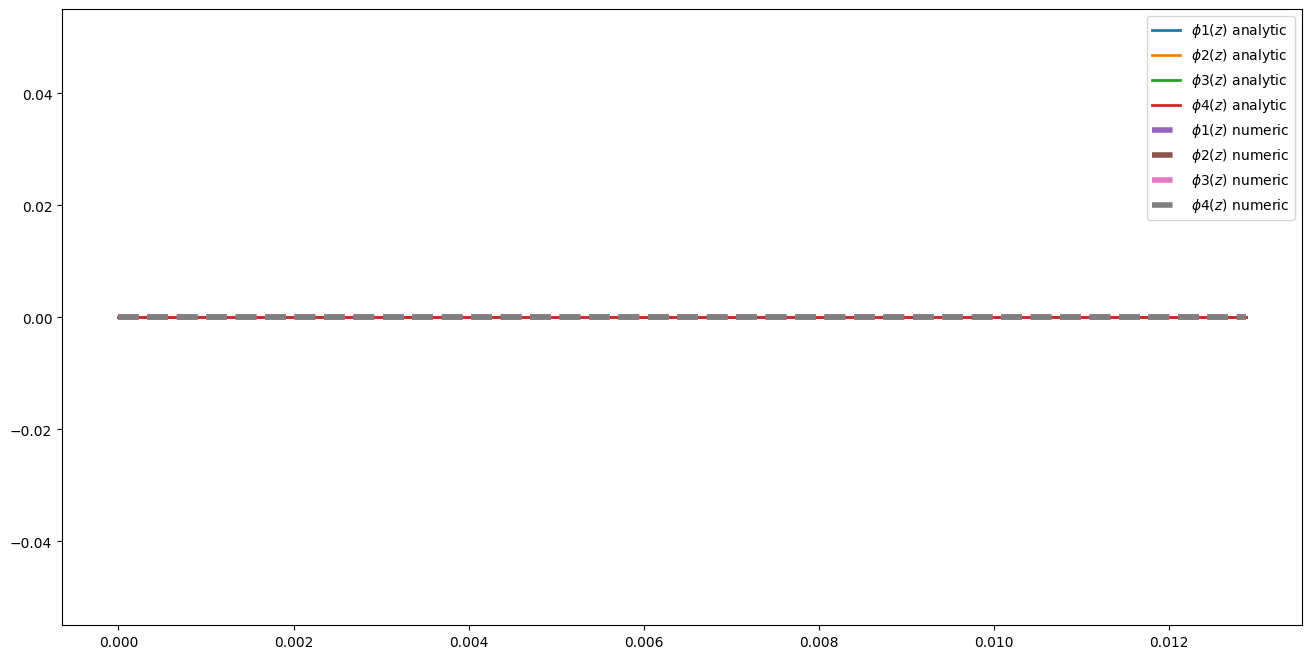

In [51]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case2_uv_ana_lines = [
    plt.plot(
        case2_z_eval[0: case2_ana_len], imag(case2_phi_A_ana[_j]),
        linestyle="solid", linewidth=2, 
        label=f'$\phi{_j+1}(z)$ analytic', #color='pink', 
    )
    for _j in range(4)
] 

# Numeric scipy plots
case2_uv_num_lines = [
    plt.plot(
        case2_z_eval[0: case2_scipy_len], imag(case2_phi_A_num[_j]),
        linestyle="dashed", linewidth=4, 
        label=f'$\phi{_j+1}(z)$ numeric', #color='pink', 
    )
    for _j in range(4)
] 

case2_legend = plt.legend()

## Case 3: Polarisation cubic case

There is no $\rho(z)^4$ term in the differential equation when $d_4=0$. This case is simpler to solve and leads to the cases for polarization dynamics and the PT symmetric examples in cubic nonlinearity that were considered in my previous paper [General complex envelope solutions of coupled-mode optics with quadratic or cubic nonlinearity](https://arxiv.org/abs/1512.03092). For $d_4=0$ we require $b_2 \pm 2$. Here we make plots for the cubic Hermitian case from that paper.

Note: in the paper these modes are denoted $E_j$ but we use $A_j$ here.

In [52]:
case3_dAs_from_u_v = [
    Eq(
        Derivative(A1(z), z),
        I*A1(z)**2*Ac1(z) + 2*I*A1(z)*A2(z)*Ac2(z)/3 + I*A1(z) + I*A2(z)**2*Ac1(z)/3
    ),
    Eq(
        Derivative(A2(z), z),
        I*A1(z)**2*Ac2(z)/3 + 2*I*A1(z)*A2(z)*Ac1(z)/3 + I*A2(z)**2*Ac2(z) - I*A2(z)
    ),
    Eq(
        Derivative(Ac1(z), z),
        -I*A1(z)*Ac1(z)**2 - I*A1(z)*Ac2(z)**2/3 - 2*I*A2(z)*Ac1(z)*Ac2(z)/3 - I*Ac1(z)
    ),
    Eq(
        Derivative(Ac2(z), z),
        -2*I*A1(z)*Ac1(z)*Ac2(z)/3 - I*A2(z)*Ac1(z)**2/3 - I*A2(z)*Ac2(z)**2 + I*Ac2(z)
    )
]

for _eq in case3_dAs_from_u_v:
    _eq

Eq(Derivative(A1(z), z), I*A1(z)**2*Ac1(z) + 2*I*A1(z)*A2(z)*Ac2(z)/3 + I*A1(z) + I*A2(z)**2*Ac1(z)/3)

Eq(Derivative(A2(z), z), I*A1(z)**2*Ac2(z)/3 + 2*I*A1(z)*A2(z)*Ac1(z)/3 + I*A2(z)**2*Ac2(z) - I*A2(z))

Eq(Derivative(Ac1(z), z), -I*A1(z)*Ac1(z)**2 - I*A1(z)*Ac2(z)**2/3 - 2*I*A2(z)*Ac1(z)*Ac2(z)/3 - I*Ac1(z))

Eq(Derivative(Ac2(z), z), -2*I*A1(z)*Ac1(z)*Ac2(z)/3 - I*A2(z)*Ac1(z)**2/3 - I*A2(z)*Ac2(z)**2 + I*Ac2(z))

In [53]:
case3_mode_degs = [
    (u(z,mu[3]), u(z,mu[1])),
    (u(z,mu[4]), u(z,mu[2])),
    (v(z,mu[3]), v(z,mu[1])),
    (v(z,mu[4]), v(z,mu[2]))
]
case3_u_v_A_subs = [
    (u(z, mu[1]), A1(z)/sqrt(3)/sqrt(I)),
    (v(z, mu[1]), Ac1(z)/sqrt(3)/sqrt(I)),
    (u(z, mu[2]), sqrt(I)*Ac2(z)/sqrt(3)),
    (v(z, mu[2]), sqrt(I)*A2(z)/sqrt(3))
]
case3_u_Ajs = [
    Eq(u(z, mu[_j]), u(z, mu[_j]).subs(case3_mode_degs + case3_u_v_A_subs))
    for _j in range(1,5)   
] 
case3_v_Ajs = [
    Eq(v(z, mu[_j]), v(z, mu[_j]).subs(case3_mode_degs + case3_u_v_A_subs))
    for _j in range(1,5)   
]
case3_u_v_Ajs = case3_u_Ajs + case3_v_Ajs

case3_A_init_vals = [
    (A1(0), (1*exp(I*pi*0.27)).evalf()), 
    (A2(0), (1.34*exp(-I*pi*1.36)).evalf())
]
case3_Ac_init_vals = [
    (Ac1(0), conjugate(A1(0).subs(case3_A_init_vals))), 
    (Ac2(0), conjugate(A2(0).subs(case3_A_init_vals)))
]
case3_A_Ac_init_vals = case3_A_init_vals + case3_Ac_init_vals

# Get init. values for u,v from init values for As
case3_u_v_0_init_vals = [
    _eq.subs(z,0).subs(case3_A_Ac_init_vals)
    .expand()
    .simplify()
    for _eq in case3_u_v_Ajs
]
case3_u_v_0_init_vals = [(_eq.lhs, _eq.rhs.evalf()) for _eq in case3_u_v_0_init_vals]

# Get norm constants for converting u,v to A, Ac
case3_u_v_norms_to_A = [
    1/complex(
        _eq.rhs.subs(z,0).subs([(A1(0),1), (A2(0),1), (Ac1(0),1), (Ac2(0),1)])
        .expand()
        .simplify()
    )
    for _eq in case3_u_v_Ajs
]


for _eq in case3_u_v_Ajs:
    _eq
    
# for _args in case3_u_v_0_init_vals:
#     Eq(*_args)

Eq(u(z, mu[1]), -sqrt(3)*I**(3/2)*A1(z)/3)

Eq(u(z, mu[2]), sqrt(3)*sqrt(I)*Ac2(z)/3)

Eq(u(z, mu[3]), -sqrt(3)*I**(3/2)*A1(z)/3)

Eq(u(z, mu[4]), sqrt(3)*sqrt(I)*Ac2(z)/3)

Eq(v(z, mu[1]), -sqrt(3)*I**(3/2)*Ac1(z)/3)

Eq(v(z, mu[2]), sqrt(3)*sqrt(I)*A2(z)/3)

Eq(v(z, mu[3]), -sqrt(3)*I**(3/2)*Ac1(z)/3)

Eq(v(z, mu[4]), sqrt(3)*sqrt(I)*A2(z)/3)

In [54]:
# Get a[j], a[j,k]
case3_ajk_syms = [(a[j,k], a[k,j]) for j in range(1,5) for k in range(1,5) if j > k]
case3_a_degs = [
    (a[3], a[1]),
    (a[4], a[2]),
    (a[1,3], a[1,1]),
    (a[3,3], a[1,1]),
    (a[2,4], a[2,2]),
    (a[4,4], a[2,2]),
    (a[3,4], a[1,2]),
    (a[2,3], a[1,2]),
    (a[1,4], a[1,2]),
]
case3_a_subs = [
    (a[1], -I),
    (a[2], -I),
    (a[1, 2], -a[1, 1]/2 - a[2, 2]/2 + Rational(1,2)),
    (a[1,1], Rational(3,2)),
    (a[2,2], Rational(3,2))
]
case3_a_j_vals = [
    (a[_j+1], a[_j+1].subs(case3_a_degs + case3_a_subs))
    for _j in range(4)
]
case3_a_jk_vals = [
    (a[_j+1, _k+1], a[_j+1, _k+1].subs(case3_ajk_syms + case3_a_degs + case3_a_subs))
    for _j in range(4) for _k in range(4)
]
case3_a_params = case3_a_j_vals + case3_a_jk_vals

for _args in case3_a_params:
    Eq(*_args)
    
Matrix([[a[_j,_k].subs(case3_a_params) for _j in range(1,5)] for _k in range(1,5)])

Eq(a[1], -I)

Eq(a[2], -I)

Eq(a[3], -I)

Eq(a[4], -I)

Eq(a[1, 1], 3/2)

Eq(a[1, 2], -1)

Eq(a[1, 3], 3/2)

Eq(a[1, 4], -1)

Eq(a[2, 1], -1)

Eq(a[2, 2], 3/2)

Eq(a[2, 3], -1)

Eq(a[2, 4], 3/2)

Eq(a[3, 1], 3/2)

Eq(a[3, 2], -1)

Eq(a[3, 3], 3/2)

Eq(a[3, 4], -1)

Eq(a[4, 1], -1)

Eq(a[4, 2], 3/2)

Eq(a[4, 3], -1)

Eq(a[4, 4], 3/2)

Matrix([
[3/2,  -1, 3/2,  -1],
[ -1, 3/2,  -1, 3/2],
[3/2,  -1, 3/2,  -1],
[ -1, 3/2,  -1, 3/2]])

In [55]:
# Derive intermediate params, invariants, and Weierstrass p values
case3_init_cons_params = get_init_cons_params(
    u_v_0_init_vals=case3_u_v_0_init_vals,
    a_params=case3_a_params
)

for _eq_args in case3_u_v_0_init_vals:
    Eq(*_eq_args)
    
for _eq_args in case3_a_params:
    Eq(*_eq_args)

_display_keys = [
    'params', 
    'invariants', 
    'weierstrass_z0', 
    'weierstrass_z1', 
    'weierstrass_mu_j', 
    'weierstrass_prime_mu_j'
] 
for _key in _display_keys:
    for _eq in case3_init_cons_params[_key]:
        _eq

Eq(u(0, mu[1]), 0.576211000316504 + 0.0362521233528056*I)

Eq(u(0, mu[2]), 0.262064375447393 - 0.727911805409626*I)

Eq(u(0, mu[3]), 0.576211000316504 + 0.0362521233528056*I)

Eq(u(0, mu[4]), 0.262064375447393 - 0.727911805409626*I)

Eq(v(0, mu[1]), -0.0362521233528056 - 0.576211000316504*I)

Eq(v(0, mu[2]), -0.727911805409626 + 0.262064375447393*I)

Eq(v(0, mu[3]), -0.0362521233528056 - 0.576211000316504*I)

Eq(v(0, mu[4]), -0.727911805409626 + 0.262064375447393*I)

Eq(a[1], -I)

Eq(a[2], -I)

Eq(a[3], -I)

Eq(a[4], -I)

Eq(a[1, 1], 3/2)

Eq(a[1, 2], -1)

Eq(a[1, 3], 3/2)

Eq(a[1, 4], -1)

Eq(a[2, 1], -1)

Eq(a[2, 2], 3/2)

Eq(a[2, 3], -1)

Eq(a[2, 4], 3/2)

Eq(a[3, 1], 3/2)

Eq(a[3, 2], -1)

Eq(a[3, 3], 3/2)

Eq(a[3, 4], -1)

Eq(a[4, 1], -1)

Eq(a[4, 2], 3/2)

Eq(a[4, 3], -1)

Eq(a[4, 4], 3/2)

Eq(b[0], -0.768383987423455)

Eq(b[1], 4.0*I)

Eq(b[2], 2)

Eq(c[0], 0.0471297488740077)

Eq(c[1], 0)

Eq(c[2], 0.434187742222222)

Eq(c[3], 0)

Eq(c[4], 1)

Eq(d[0], 0.401894956632738)

Eq(d[1], -6.14707189938764*I)

Eq(d[2], -20.8102869185827)

Eq(d[3], 16.0*I)

Eq(d[4], 0)

Eq(gamma[1], -0.465933333333333*I)

Eq(gamma[2], 0.465933333333333*I)

Eq(gamma[3], -0.465933333333333*I)

Eq(gamma[4], 0.465933333333333*I)

Eq(Lambda[0, 1], 1.7956*I)

Eq(Lambda[0, 2], -3.7956*I)

Eq(Lambda[0, 3], 1.7956*I)

Eq(Lambda[0, 4], -3.7956*I)

Eq(Lambda[1, 1], 0)

Eq(Lambda[1, 2], 0)

Eq(Lambda[1, 3], 0)

Eq(Lambda[1, 4], 0)

Eq(a[0], 1.40255472368765)

Eq(lambda[1], 0.e-23 - 0.907983993190531*I)

Eq(g2, 11.5007158719273)

Eq(g3, 5.51301581685033)

Eq(wp(z0, g2, g3), -0.658773008925577 - 4.8888667821882e-23*I)

Eq(\wp'(z0, g2, g3), 0.959042853273196 + 2.00848241666113e-23*I)

Eq(wp(z1, g2, g3), 1.89774539621356 + 2.64697796016969e-23*I)

Eq(\wp'(z1, g2, g3), 0)

Eq(wp(-z0 + mu[1], g2, g3), -2.58654482129735 - 7.6855052329845e-23*I)

Eq(wp(-z0 + mu[2], g2, g3), 0.454948649005176 - 2.14237321252303e-23*I)

Eq(wp(-z0 + mu[3], g2, g3), -2.58654482129735 - 7.6855052329845e-23*I)

Eq(wp(-z0 + mu[4], g2, g3), 0.454948649005176 - 2.14237321252303e-23*I)

Eq(\wp'(-z0 + mu[1], g2, g3), 5.41365729549465e-23 - 6.70701523795522*I)

Eq(\wp'(-z0 + mu[2], g2, g3), -9.13794040945833e-23 + 3.22002997226041*I)

Eq(\wp'(-z0 + mu[3], g2, g3), 5.41365729549465e-23 - 6.70701523795522*I)

Eq(\wp'(-z0 + mu[4], g2, g3), -9.13794040945833e-23 + 3.22002997226041*I)

In [56]:
case3_lattice_and_weierstrass_args = get_lattice_and_weierstrass_args(
    init_cons_params=case3_init_cons_params,
    _wp_tolerance = 1e-5,
    _wpp_tolerance = 1e-4
)

case3_lattice_and_weierstrass_args["z0"]
case3_lattice_and_weierstrass_args["z1"]
for _eq in case3_lattice_and_weierstrass_args["omegas"]:
    _eq
for _eq in case3_lattice_and_weierstrass_args["mujs"]:
    _eq

Eq(z0, 0.679767783551812 - 1.18810849039841*I)

Eq(z1, 0.934807266298919 - 4.5381804602783e-8*I)

Eq(omega[1], 0.934807304291401 + 6.54924061949382e-15*I)

Eq(omega[2], -0.934807304291417 + 1.1881084903984*I)

Eq(omega[3], -1.55593853737728e-14 + 1.18810849039841*I)

Eq(mu[1], 0.679767783551844 - 2.91498173864384*I)

Eq(mu[2], -0.255039520739591 - 0.649343732551389*I)

Eq(mu[3], 0.679767783551844 - 2.91498173864384*I)

Eq(mu[4], -0.255039520739591 - 0.649343732551389*I)

In [57]:
case3_epsilon_offsets = get_epsilon_offsets_cubic(
    u_v_0_init_vals=case3_u_v_0_init_vals,
    init_cons_params=case3_init_cons_params,
    lattice_and_weierstrass_args=case3_lattice_and_weierstrass_args,
    ratio_test_tolerance=1e-6
)

# for _eq in case2_epsilon_offsets['epsilon_j_u0_vals']:
#     _eq
    
# for _eq in case2_epsilon_offsets['epsilon_j_v0_vals']:
#     _eq

In [58]:
# Setup z array to evaluate over based on multiple periods (multiples of 2*omega1)
case3_show_n_periods = 2
case3_z_end = abs(case3_show_n_periods * 2 * complex(case3_lattice_and_weierstrass_args["omegas"][0].rhs))
case3_n_points_z = 1000
case3_z_eval = linspace(0, case3_z_end, case3_n_points_z)

# For forcing to real
real_tolerance = 1e5

In [59]:
case3_A_prime_vec = [_eq.rhs for _eq in case3_dAs_from_u_v]
case3_A_symbs = [Symbol(f'_A{_j + 1}_symb') for _j in range(2)]
case3_Ac_symbs = [Symbol(f'_Ac{_j + 1}_symb') for _j in range(2)]
case3_A_Ac_funcs = [A1(z), A2(z), Ac1(z), Ac2(z)]
case3_symb_subs = [(case3_A_Ac_funcs[_j], _s) for _j, _s in enumerate(case3_A_symbs + case3_Ac_symbs)]


case3_A_prime_symb = [_eq.subs(case3_symb_subs) for _eq in case3_A_prime_vec]
case_3_A_f_ = lambdify((z, (*case3_A_symbs, *case3_Ac_symbs)), case3_A_prime_symb)
case3_init_A_numeric_only = [float(re(x[1])) + float(im(x[1])) * 1j for x in case3_A_Ac_init_vals]

case3_A_solution = scipy.integrate.solve_ivp(
    case_3_A_f_, 
    (0, case3_z_end), 
    case3_init_A_numeric_only, 
    method='DOP853',        # 8th order method (more accurate than default RK45)
    t_eval=case3_z_eval,
    rtol=1e-11,             # Relative tolerance (default is 1e-3)
    atol=1e-13,             # Absolute tolerance (default is 1e-6)
    max_step=0.05,           # Limit step size (adjust based on z_end scale)
    dense_output=True
)

case3_A_sol_scipy = case3_A_solution.y

case3_abs_A_num = [
    real_if_close(
        case3_A_sol_scipy[_j]*case3_A_sol_scipy[_j + 2]
        , 
        tol=real_tolerance
    )
    for _j in range(2)
]
case3_phi_A_num = [
    real_if_close(
        -1.0j/2.0*np_log(
            case3_A_sol_scipy[_j]/case3_A_sol_scipy[_j + 2]
        ), 
        tol=real_tolerance
    )
    for _j in range(2)
]

case3_scipy_len = len(case3_abs_A_num[0])

In [60]:
# Checks that the numeric solution started with the correct values
case3_abs_0_tolerance = 1e-14
case3_phi_0_tolerance = 1e-14
case3_avoid_div_0 = 1e-20

case3_init_num_abs_vals_checks = [
    2 * abs(
        (case3_A_Ac_init_vals[_j][1]*case3_A_Ac_init_vals[_j+2][1]).expand().simplify() - 
        case3_abs_A_num[_j][0]
    ) / (abs(
        (case3_A_Ac_init_vals[_j][1]*case3_A_Ac_init_vals[_j+2][1]).expand().simplify() +
        case3_abs_A_num[_j][0]
    ) + case3_avoid_div_0) > case3_abs_0_tolerance
    for _j in range(2)
]
for _j, _ch in enumerate(case3_init_num_abs_vals_checks):
    if _ch:
        (
            (case3_A_Ac_init_vals[_j][1]*case3_A_Ac_init_vals[_j+2][1]).expand().simplify(), 
            case3_abs_A_num[_j][0]
        )
        raise ValueError('case3_init_num_abs_vals_checks failed')
    

case3_init_num_phi_vals_checks = [
    2 * abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case3_A_Ac_init_vals[_j][1]/case3_A_Ac_init_vals[_j+2][1]).expand().simplify())
            )
        ) - case3_phi_A_num[_j][0]
    ) / (abs(
        real_if_close(
            -1.0j/2.0*np_log(
                complex((case3_A_Ac_init_vals[_j][1]/case3_A_Ac_init_vals[_j+2][1]).expand().simplify())
            )
        ) + case3_phi_A_num[_j][0]
    ) + case3_avoid_div_0) > case3_phi_0_tolerance
    for _j in range(2)
]
if any(case3_init_num_phi_vals_checks):
    print()
    raise ValueError('case3_init_num_phi_vals_checks failed')

In [61]:
case3_kron_sol_mpmath = get_numeric_eval_of_analytic_solution_u_v(
    u_v_0_init_vals=case3_u_v_0_init_vals,
    a_params=case3_a_params,
    init_cons_params=case3_init_cons_params,
    lattice_and_weierstrass_args=case3_lattice_and_weierstrass_args,
    epsilon_offsets=case3_epsilon_offsets,
    z_eval_vec=case3_z_eval
)

case3_abs_A_ana = [
    real_if_close(
        case3_kron_sol_mpmath['u_j_evals'][_j]*case3_u_v_norms_to_A[_j]*
        case3_kron_sol_mpmath['v_j_evals'][_j]*case3_u_v_norms_to_A[_j + 2], 
        tol=real_tolerance
    )
    for _j in range(2)
]
case3_phi_A_ana = [
    real_if_close(
        -1.0j/2.0*np_log(
            case3_kron_sol_mpmath['u_j_evals'][_j]*case3_u_v_norms_to_A[_j]/
            (case3_kron_sol_mpmath['v_j_evals'][_j]*case3_u_v_norms_to_A[_j + 2])
        ), 
        tol=real_tolerance
    )
    for _j in range(2)
]
case3_phi_A_ana = [
    case3_phi_A_ana[0],
    -case3_phi_A_ana[1] # Correction as this gives Ac2(z)/A2(z) not A2(z)/Ac2(z) 
]

case3_ana_len = len(case3_abs_A_ana[0])

Using cubic case as d4=0


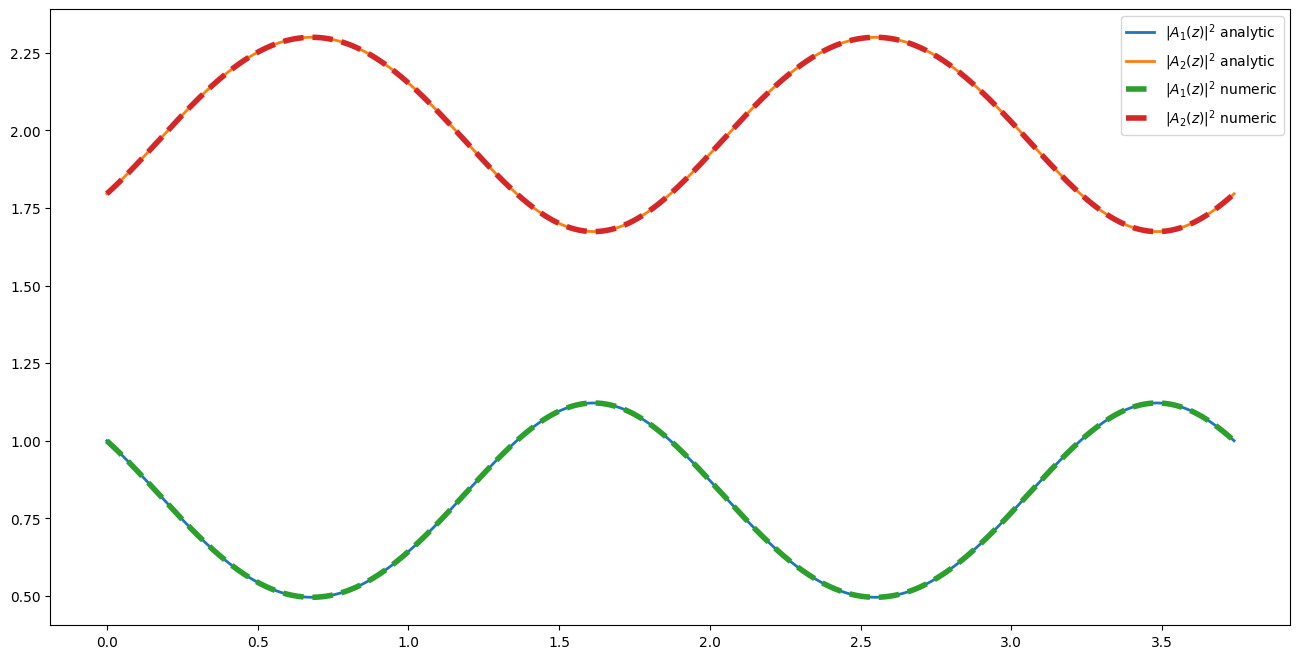

In [62]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case3_uv_ana_lines = [
    plt.plot(
        case3_z_eval[0: case3_ana_len], real(case3_abs_A_ana[_j]),
        linestyle="solid", linewidth=2, label=f'$|A_{_j+1}(z)|^2$ analytic', #color='pink', 
    )
    for _j in range(2)
]

# Numeric scipy plots
case3_uv_num_lines = [
    plt.plot(
        case3_z_eval[0: case3_scipy_len], real(case3_abs_A_num[_j]),
        linestyle="dashed", linewidth=4, label=f'$|A_{_j+1}(z)|^2$ numeric', #color='pink', 
    )
    for _j in range(2)
] 

case3_legend = plt.legend()

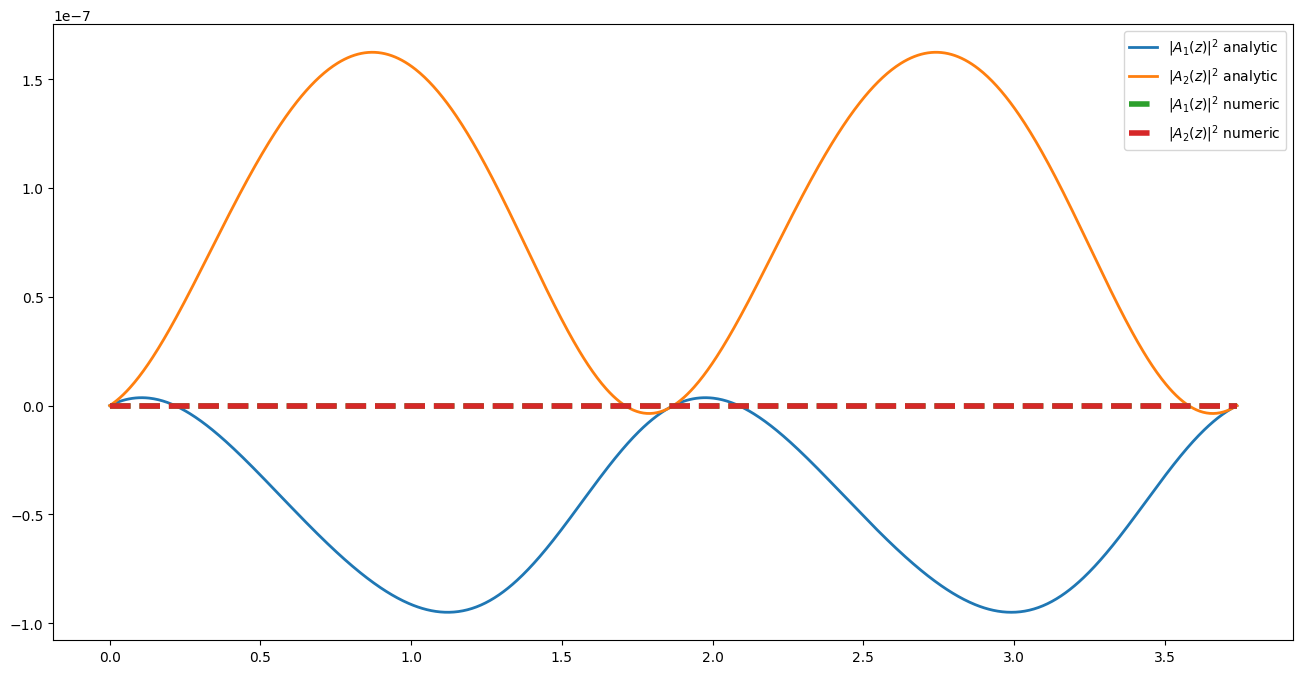

In [63]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case3_uv_ana_lines = [
    plt.plot(
        case3_z_eval[0: case3_ana_len], imag(case3_abs_A_ana[_j]),
        linestyle="solid", linewidth=2, label=f'$|A_{_j+1}(z)|^2$ analytic', #color='pink', 
    )
    for _j in range(2)
]

# Numeric scipy plots
case3_uv_num_lines = [
    plt.plot(
        case3_z_eval[0: case3_scipy_len], imag(case3_abs_A_num[_j]),
        linestyle="dashed", linewidth=4, label=f'$|A_{_j+1}(z)|^2$ numeric', #color='pink', 
    )
    for _j in range(2)
] 

case3_legend = plt.legend()

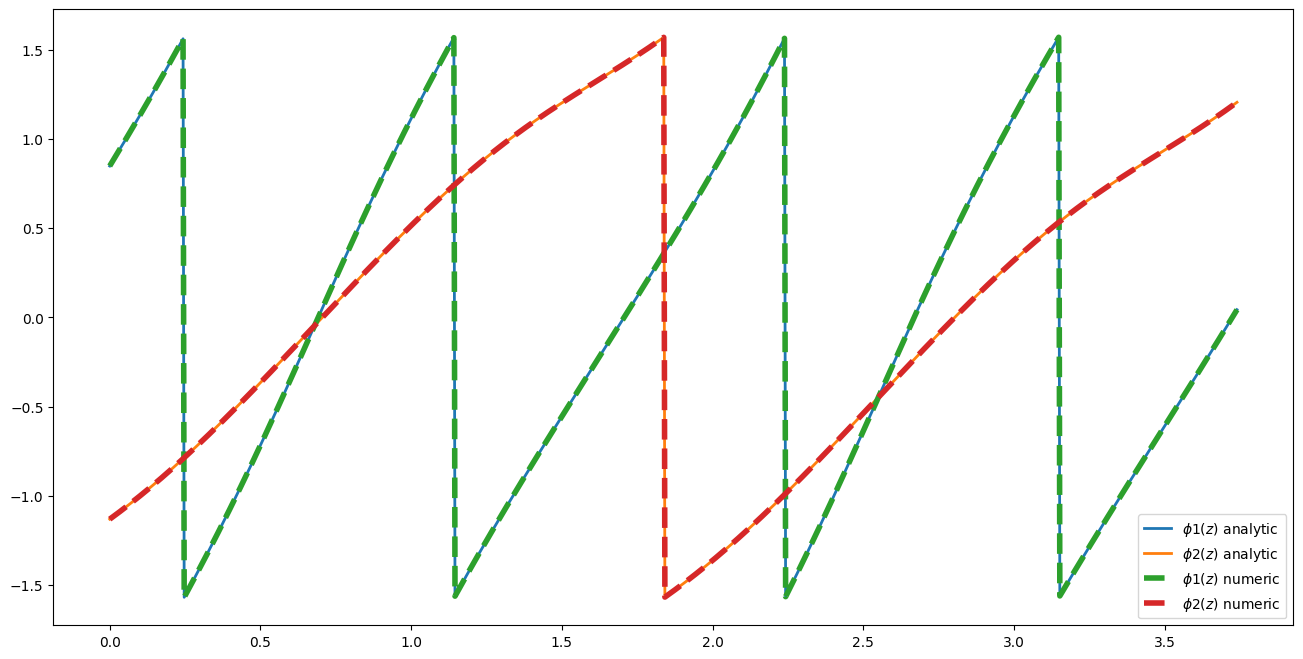

In [64]:
fig = plt.figure(figsize=(16, 8))

# Analytic plots
case3_uv_ana_lines = [
    plt.plot(
        case3_z_eval[0: case3_ana_len], real(case3_phi_A_ana[_j]),
        linestyle="solid", linewidth=2, 
        label=f'$\phi{_j+1}(z)$ analytic', #color='pink', 
    )
    for _j in range(2)
] 

# Numeric scipy plots
case3_uv_num_lines = [
    plt.plot(
        case3_z_eval[0: case3_scipy_len], real(case3_phi_A_num[_j]),
        linestyle="dashed", linewidth=4, 
        label=f'$\phi{_j+1}(z)$ numeric', #color='pink', 
    )
    for _j in range(2)
] 

case3_legend = plt.legend()

## Numerical Checks for Canonical Coordinates

In [65]:
case1_param_subs = [_.args for _ in case1_init_cons_params['params']]

case_can_tol = 1e-11

# Hamiltonian in the original coordinates (check a[0] = H)

H_a0_orig = Eq(H, a[0])
H_orig = Eq(
    H,
    (
        - Sum(u(z, mu[l])*v(z, mu[l])*a[l], (l, 1, 4)) 
        - Sum(u(z, mu[k])*u(z, mu[l])*v(z, mu[k])*v(z, mu[l])*a[l, k]/2, (l, 1, 4), (k, 1, 4))
        + Product(u(z, mu[l]), (l, 1, 4)) + Product(v(z, mu[l]), (l, 1, 4))
    )
)
H_a0_orig_val = Eq(H_a0_orig.lhs, H_a0_orig.rhs.subs(case1_param_subs))
H_orig_val = Eq(
    H_orig.lhs,
    H_orig.rhs
    .doit().subs(z,0).subs(case1_u_v_0_init_vals).subs(case1_a_params).evalf()
)
H_a0_orig_check = abs(H_a0_orig_val.rhs - H_orig_val.rhs)
if H_a0_orig_check > case_can_tol:
    raise ValueError('H_a0_orig_check failed')
    
# Hamiltonian in the hat coords (after gauge transform)
u_orig_hat_to_orig_subs = [(uhat(z, mu[_j+1]), u(z, mu[_j+1])) for _j in range(4)]
v_orig_hat_to_orig_subs = [(vhat(z, mu[_j+1]), v(z, mu[_j+1])) for _j in range(4)]
u_v_orig_hat_to_orig_subs = u_orig_hat_to_orig_subs + v_orig_hat_to_orig_subs
Hhat_inits = Eq(
    Hhat,
    Product(uhat(z, mu[l]), (l, 1, 4)) + Product(vhat(z, mu[l]), (l, 1, 4)) 
    - Sum(uhat(z, mu[l])**2*vhat(z, mu[l])**2*b[2]/4 - uhat(z, mu[l])*vhat(z, mu[l])*b[1]/4, (l, 1, 4))
)
Hhat_inits_val = Eq(
    Hhat_inits.lhs,
    Hhat_inits.rhs
    .doit()
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs).evalf()
)
Hhat_b = Eq(
    Hhat, 
    b[0] - b[2]*Sum(gamma[l]**2/4, (l, 1, 4))
)
Hhat_b_val = Eq(
    Hhat_b.lhs,
    Hhat_b.rhs
    .doit()
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs).evalf()
)

Hhat_inits_to_hat_check = abs(Hhat_inits_val.rhs - Hhat_b_val.rhs)
if Hhat_inits_to_hat_check > case_can_tol:
    raise ValueError('Hhat_inits_to_hat_check failed')

    
# H_a0_orig
# H_orig
# Hhat_inits
# Hhat_b

In [66]:
U_as_uhat = Eq(
    U(z, mu[j]),
    -I*sqrt(d[5]*lam[1]/(lam[1] + Sum(uhat(z, mu[l])*vhat(z, mu[l]), (l, 1, 4))/4))
    *uhat(z, mu[j])/(2*sqrt(-gamma[j] + lam[1])*sqrt(lam[1]))
)
V_as_vhat = Eq(
    V(z, mu[j]),
    -I*sqrt(d[5]*lam[1]/(lam[1] + Sum(uhat(z, mu[l])*vhat(z, mu[l]), (l, 1, 4))/4))
    *vhat(z, mu[j])/(2*sqrt(-gamma[j] + lam[1])*sqrt(lam[1]))
)

C_b_poly = Eq(C, (-1)**m*(b[0] + b[1]*lam[1] + b[2]*lam[1]**2)/2)
d5_lam1 = Eq(d[5], d[1] + 2*d[2]*lam[1] + 3*d[3]*lam[1]**2 + 4*d[4]*lam[1]**3)
K_ham_UVj_C = Eq(
    K,
    2*(-1)**m*C*Sum(U(z, mu[j])**2*V(z, mu[j])**2, (j, 1, 4))/d[5] 
    - 4*C*(Product(U(z, mu[l]), (l, 1, 4)) + Product(V(z, mu[l]), (l, 1, 4)))/d[5] 
    - Sum(
        ((-1)**m*C/(gamma[j] - lam[1]) + b[1]/4 + b[2]*gamma[j]/2 + b[2]*lam[1]/2)
        *U(z, mu[j])*V(z, mu[j]), 
        (j, 1, 4)
    )
)
K_ham_UVj_C_as_params_b = Eq(
    K,
    -(-1)**m*(b[1]**2 + 2*b[1]*b[2]*lam[1] - 4*c[2] - 24*lam[1]**2)*d[5]/(16*C) 
    - (-1)**m*d[5]**3/(128*C**3) - 3*b[2]*d[5]/4 + (3*b[1] + 4*b[2]*lam[1])*d[5]**2/(64*C**2)
)


UV_hat_power_sum = Eq(
    Sum(U(z, mu[j])*V(z, mu[j])*gamma[j], (j, 1, 4)),
    d[5]*lam[1]*Sum(1/(gamma[j] - lam[1]), (j, 1, 4))/4 + d[5]
)

K_ham_UVj_C_as_params = Eq(
    K,
    -(-1)**m*C*d[5]*Sum((gamma[j] - lam[1])**(-2), (j, 1, 4))/8 
    - (b[1] + 4*b[2]*lam[1])*d[5]*Sum(1/(gamma[j] - lam[1]), (j, 1, 4))/16 - 3*b[2]*d[5]/4
)

gam_sum_d5_1_C = Eq(
    Sum(1/(gamma[k] - lam[1]), (k, 1, 4)),
    (-2*(-1)**m*C*(2*b[1] + 4*b[2]*lam[1]) + d[5])/(4*C**2)
)
gam_sum_d5_2_C = Eq(
    Sum((gamma[k] - lam[1])**(-2), (k, 1, 4)),
    -(2*c[2] + 12*lam[1]**2)/C**2 + (-2*(-1)**m*C*(2*b[1] + 4*b[2]*lam[1]) + d[5])**2/(16*C**4)
)


gam_sum_d5_2 = Eq(
    Sum((gamma[k] - lam[1])**(-2), (k, 1, 4)),
    -4*(2*c[2] + 12*lam[1]**2)/(b[0] + b[1]*lam[1] + b[2]*lam[1]**2)**2 
    + (
        -(2*b[1] + 4*b[2]*lam[1])*(b[0] + b[1]*lam[1] + b[2]*lam[1]**2) 
        + d[1] + 2*d[2]*lam[1] + 3*d[3]*lam[1]**2 + 4*d[4]*lam[1]**3
    )**2/(b[0] + b[1]*lam[1] + b[2]*lam[1]**2)**4
)

U_as_uhat
V_as_vhat
C_b_poly
d5_lam1
K_ham_UVj_C
K_ham_UVj_C_as_params_b
UV_hat_power_sum
K_ham_UVj_C_as_params
gam_sum_d5_1_C
gam_sum_d5_2_C
gam_sum_d5_2

Eq(U(z, mu[j]), -I*sqrt(d[5]*lambda[1]/(lambda[1] + Sum(uhat(z, mu[l])*vhat(z, mu[l]), (l, 1, 4))/4))*uhat(z, mu[j])/(2*sqrt(-gamma[j] + lambda[1])*sqrt(lambda[1])))

Eq(V(z, mu[j]), -I*sqrt(d[5]*lambda[1]/(lambda[1] + Sum(uhat(z, mu[l])*vhat(z, mu[l]), (l, 1, 4))/4))*vhat(z, mu[j])/(2*sqrt(-gamma[j] + lambda[1])*sqrt(lambda[1])))

Eq(C, (-1)**m*(b[0] + b[1]*lambda[1] + b[2]*lambda[1]**2)/2)

Eq(d[5], d[1] + 2*d[2]*lambda[1] + 3*d[3]*lambda[1]**2 + 4*d[4]*lambda[1]**3)

Eq(K, 2*(-1)**m*C*Sum(U(z, mu[j])**2*V(z, mu[j])**2, (j, 1, 4))/d[5] - 4*C*(Product(U(z, mu[l]), (l, 1, 4)) + Product(V(z, mu[l]), (l, 1, 4)))/d[5] - Sum(((-1)**m*C/(gamma[j] - lambda[1]) + b[1]/4 + b[2]*gamma[j]/2 + b[2]*lambda[1]/2)*U(z, mu[j])*V(z, mu[j]), (j, 1, 4)))

Eq(K, -(-1)**m*(b[1]**2 + 2*b[1]*b[2]*lambda[1] - 4*c[2] - 24*lambda[1]**2)*d[5]/(16*C) - (-1)**m*d[5]**3/(128*C**3) - 3*b[2]*d[5]/4 + (3*b[1] + 4*b[2]*lambda[1])*d[5]**2/(64*C**2))

Eq(Sum(U(z, mu[j])*V(z, mu[j])*gamma[j], (j, 1, 4)), d[5]*lambda[1]*Sum(1/(gamma[j] - lambda[1]), (j, 1, 4))/4 + d[5])

Eq(K, -(-1)**m*C*d[5]*Sum((gamma[j] - lambda[1])**(-2), (j, 1, 4))/8 - (b[1] + 4*b[2]*lambda[1])*d[5]*Sum(1/(gamma[j] - lambda[1]), (j, 1, 4))/16 - 3*b[2]*d[5]/4)

Eq(Sum(1/(gamma[k] - lambda[1]), (k, 1, 4)), (-2*(-1)**m*C*(2*b[1] + 4*b[2]*lambda[1]) + d[5])/(4*C**2))

Eq(Sum((gamma[k] - lambda[1])**(-2), (k, 1, 4)), (-2*c[2] - 12*lambda[1]**2)/C**2 + (-2*(-1)**m*C*(2*b[1] + 4*b[2]*lambda[1]) + d[5])**2/(16*C**4))

Eq(Sum((gamma[k] - lambda[1])**(-2), (k, 1, 4)), (-8*c[2] - 48*lambda[1]**2)/(b[0] + b[1]*lambda[1] + b[2]*lambda[1]**2)**2 + ((-2*b[1] - 4*b[2]*lambda[1])*(b[0] + b[1]*lambda[1] + b[2]*lambda[1]**2) + d[1] + 2*d[2]*lambda[1] + 3*d[3]*lambda[1]**2 + 4*d[4]*lambda[1]**3)**2/(b[0] + b[1]*lambda[1] + b[2]*lambda[1]**2)**4)

In [67]:
m_choice_eq = Eq(
    (-1)**m,
    (b[0] + b[1]*lam[1] + b[2]*lam[1]**2)/(2*Product(sqrt(-gamma[l] + lam[1]), (l, 1, 4)))
)
m_choice_val = Eq(
    m_choice_eq.lhs,
    m_choice_eq.rhs
    .doit()
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .expand().doit().evalf()
)
m_choice_val_check = abs(1 - abs(m_choice_val.rhs)) > 1e-12
if m_choice_val_check:
    raise ValueError('m_choice_val_check failed')

if round(m_choice_val.rhs) < 0:
    m_choice = 1
else:
    m_choice = 0

m_choice_eq
Eq(m, m_choice)

Eq((-1)**m, (b[0] + b[1]*lambda[1] + b[2]*lambda[1]**2)/(2*Product(sqrt(-gamma[l] + lambda[1]), (l, 1, 4))))

Eq(m, 0)

In [68]:
U_to_uhat_subs = [U_as_uhat.doit().subs(j,_j+1).args for _j in range(4)]
V_to_vhat_subs = [V_as_vhat.doit().subs(j,_j+1).args for _j in range(4)]
U_V_to_u_v_hat_subs = U_to_uhat_subs + V_to_vhat_subs



# Note this test only passes with the appropriate choice of m
K_ham_UVj_C_val = Eq(
    K_ham_UVj_C.lhs,
    K_ham_UVj_C.rhs.doit()
    .subs(U_V_to_u_v_hat_subs)
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .expand().doit().evalf()
)
K_ham_UVj_C_as_params_val = Eq(
    K_ham_UVj_C_as_params.lhs,
    K_ham_UVj_C_as_params.rhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
K_ham_UVj_C_as_params_val_check = abs(K_ham_UVj_C_val.rhs - K_ham_UVj_C_as_params_val.rhs)
if K_ham_UVj_C_as_params_val_check > case_can_tol:
    K_ham_UVj_C_as_params
    K_ham_UVj_C
    raise ValueError('K_ham_UVj_C_as_params_val_check failed')
       
# -----
K_ham_UVj_C_as_params_b_val = Eq(
    K_ham_UVj_C_as_params_b.lhs,
    K_ham_UVj_C_as_params_b.rhs
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .expand().doit().evalf()
)   
K_ham_UVj_C_as_params_b_val_check = abs(K_ham_UVj_C_val.rhs - K_ham_UVj_C_as_params_b_val.rhs)
if K_ham_UVj_C_as_params_b_val_check > case_can_tol:
    raise ValueError('K_ham_UVj_C_as_params_b_val_check failed')

    
# -----
gam_sum_d5_1_C_lhs_val = Eq(
    gam_sum_d5_1_C.lhs, 
    gam_sum_d5_1_C.lhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_1_C_rhs_val = Eq(
    gam_sum_d5_1_C.lhs, 
    gam_sum_d5_1_C.rhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_1_C_val_check = abs(gam_sum_d5_1_C_lhs_val.rhs - gam_sum_d5_1_C_rhs_val.rhs)
if gam_sum_d5_1_C_val_check > case_can_tol:
    raise ValueError('gam_sum_d5_1_C_val_check failed')

# -----
gam_sum_d5_2_C_lhs_val = Eq(
    gam_sum_d5_2_C.lhs, 
    gam_sum_d5_2_C.lhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_2_C_rhs_val = Eq(
    gam_sum_d5_2_C.lhs, 
    gam_sum_d5_2_C.rhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_2_C_val_check = abs(gam_sum_d5_2_C_lhs_val.rhs - gam_sum_d5_2_C_rhs_val.rhs)
if gam_sum_d5_2_C_val_check > case_can_tol:
    gam_sum_d5_2_C_lhs_val
    gam_sum_d5_2_C_rhs_val
    raise ValueError('gam_sum_d5_2_C_val_check failed')

# -----
gam_sum_d5_2_lhs_val = Eq(
    gam_sum_d5_2.lhs, 
    gam_sum_d5_2.lhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_2_rhs_val = Eq(
    gam_sum_d5_2.lhs, 
    gam_sum_d5_2.rhs
    .expand().doit()
    .subs([C_b_poly.args, d5_lam1.args, (m, m_choice)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
gam_sum_d5_2_val_check = abs(gam_sum_d5_2_lhs_val.rhs - gam_sum_d5_2_rhs_val.rhs)
if gam_sum_d5_2_val_check > case_can_tol:
    raise ValueError('gam_sum_d5_2_val_check failed')

In [71]:
# Hamiltonian in the bar coords (after linear gauge transform)
ubar_to_U_subs = [(ubar(z, mu[_j+1]), U(z, mu[_j+1])) for _j in range(4)]
vbar_to_V_subs = [(vbar(z, mu[_j+1]), V(z, mu[_j+1])) for _j in range(4)]
u_v_bar_to_U_V_subs = ubar_to_U_subs + vbar_to_V_subs

chi_d5_C = Eq(chi, 16*(-1)**m*C/d[5])
H_bar_uv_j_chi = Eq(
    Hbar,
    -(-1)**m*chi*(Product(ubar(z, mu[l]), (l, 1, 4)) + Product(vbar(z, mu[l]), (l, 1, 4)))/4 
    + chi*Sum(ubar(z, mu[j])**2*vbar(z, mu[j])**2, (j, 1, 4))/8 
    - Sum(ubar(z, mu[j])*vbar(z, mu[j]), (j, 1, 4))/chi
)

H_bar_val = Eq(
    Hbar,
    (-1)**m*(b[1]**2 + 4*b[1]*b[2]*lam[1] + 4*b[2]**2*lam[1]**2 - 2*c[2] - 12*lam[1]**2)*d[5]/(8*C) 
    + (-1)**m*d[5]**3/(256*C**3) - b[2]*d[5]/4 - 3*(b[1] + 2*b[2]*lam[1])*d[5]**2/(64*C**2)
)

H_bar_uv_j_chi_val = Eq(
    H_bar_uv_j_chi.lhs,
    H_bar_uv_j_chi.rhs
    .doit()
    .subs(u_v_bar_to_U_V_subs)
    .subs(U_V_to_u_v_hat_subs)
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)
H_bar_val_val = Eq(
    H_bar_val.lhs,
    H_bar_val.rhs
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
    ])
    .subs([((-1)**(2*m), 1)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
H_bar_uv_j_chi_val_check = abs(H_bar_val_val.rhs - H_bar_uv_j_chi_val.rhs)
if H_bar_uv_j_chi_val_check > case_can_tol:
    raise ValueError('H_bar_uv_j_chi_val_check failed')

H_bar_min_K_bar_val = Eq(
    Hbar,
    K.subs([K_ham_UVj_C_as_params.args]) 
    - (-1)**m*d[5]*Sum(d[5]/(4*gamma[j] - 4*lam[1]), (j, 1, 4))/(16*C) 
    + Sum(
        ((-1)**m*C/(gamma[j] - lam[1]) + b[1]/4 + b[2]*gamma[j]/2 + b[2]*lam[1]/2)*d[5]/(4*gamma[j] - 4*lam[1]), 
        (j, 1, 4)
    )
)
H_bar_min_K_bar_val_val = Eq(
    H_bar_min_K_bar_val.lhs,
    H_bar_min_K_bar_val.rhs
    .doit()
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
    ])
    .subs([((-1)**(2*m), 1)])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .evalf()
)
H_bar_min_K_bar_val_val_check = abs(H_bar_val_val.rhs - H_bar_min_K_bar_val_val.rhs)
if H_bar_min_K_bar_val_val_check > case_can_tol:
    raise ValueError('H_bar_min_K_bar_val_val_check failed')


K_ham_uv_bar_j = Eq(
    K,
    2*(-1)**m*C*Sum(ubar(z, mu[j])**2*vbar(z, mu[j])**2, (j, 1, 4))/d[5] 
    - 4*C*(Product(ubar(z, mu[l]), (l, 1, 4)) + Product(vbar(z, mu[l]), (l, 1, 4)))/d[5] 
    - Sum(
        ((-1)**m*C/(gamma[j] - lam[1]) + b[1]/4 + b[2]*gamma[j]/2 + b[2]*lam[1]/2)
        *ubar(z, mu[j])*vbar(z, mu[j]), 
        (j, 1, 4)
    )
)
K_ham_uv_bar_j_val = Eq(
    K_ham_uv_bar_j.lhs,
    K_ham_uv_bar_j.rhs
    .doit()
    .subs(u_v_bar_to_U_V_subs)
    .subs(U_V_to_u_v_hat_subs)
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)
K_ham_uv_bar_j_val_check = abs(K_ham_UVj_C_val.rhs - K_ham_uv_bar_j_val.rhs)
if K_ham_uv_bar_j_val_check > case_can_tol:
    K_ham_uv_bar_j
    K_ham_UVj_C
    raise ValueError('K_ham_uv_bar_j_val_check failed')

# chi_d5_C
# H_bar_uv_j_chi
# H_bar_val
# K_ham_uv_bar_j

# H_bar_uv_j_chi_val
# H_bar_val_val
# H_bar_min_K_bar_val_val
# K_ham_uv_bar_j_val
# K_ham_UVj_C_val

In [99]:
# Hamiltonian in the tilde coords (after rescaling)
ubar_to_utilde = Eq(
    ubar(z, mu[j]),
    utilde((-1)**m*z*d[5]/(16*C), mu[j])*exp(-I*pi*m/4)*d[5]/(16*C)
)
vbar_to_vtilde = Eq(
    vbar(z, mu[j]),
    vtilde((-1)**m*z*d[5]/(16*C), mu[j])*exp(I*pi*m/4)*d[5]/(16*C)
)
z_t_d5 = Eq(z, 16*C*t/((-1)**m*d[5]))
utilde_to_ubar = Eq(
    utilde(t, mu[j]), 
    solve(Eq(ubar_to_utilde.lhs, ubar_to_utilde.rhs.subs([z_t_d5.args])), utilde(t, mu[j]))[0]
)
vtilde_to_vbar = Eq(
    vtilde(t, mu[j]), 
    solve(Eq(vbar_to_vtilde.lhs, vbar_to_vtilde.rhs.subs([z_t_d5.args])), vtilde(t, mu[j]))[0]
)
utilde_to_ubar_subs = [utilde_to_ubar.subs(j,_j+1).args for _j in range(4)]
vtilde_to_vbar_subs = [vtilde_to_vbar.subs(j,_j+1).args for _j in range(4)]
u_v_tilde_to_u_v_bar_subs = utilde_to_ubar_subs + vtilde_to_vbar_subs

# Hamiltonian formulas
H_tilde_uv_j = Eq(
    Htilde,
    -Product(utilde(t, mu[l]), (l, 1, 4))/4 - Product(vtilde(t, mu[l]), (l, 1, 4))/4 
    - Sum(utilde(t, mu[j])*vtilde(t, mu[j]), (j, 1, 4)) 
    + Sum(utilde(t, mu[j])**2*vtilde(t, mu[j])**2, (j, 1, 4))/8
)
H_tilde_uv_j_val_c = Eq(
    Htilde,
    -192*(-1)**m*C*(b[1] + 2*b[2]*lam[1])/d[5] + 
    512*C**2*(b[1]**2 + 4*b[1]*b[2]*lam[1] + 4*b[2]**2*lam[1]**2 - 2*c[2] - 12*lam[1]**2)/d[5]**2 
    + 16 - 1024*C**3*b[2]/((-1)**m*d[5]**2)
)
H_tilde_uv_j_val_chi = Eq(Htilde, Hbar*chi**3)

H_tilde_uv_j_val = Eq(
    H_tilde_uv_j.lhs,
    H_tilde_uv_j.rhs
    .doit()
    .subs(u_v_tilde_to_u_v_bar_subs)
    .subs(u_v_bar_to_U_V_subs)
    .subs(U_V_to_u_v_hat_subs)
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)

H_tilde_uv_j_val_c_val = Eq(
    H_tilde_uv_j_val_c.lhs,
    H_tilde_uv_j_val_c.rhs
    .doit()
    .subs(u_v_tilde_to_u_v_bar_subs)
    .subs(u_v_bar_to_U_V_subs)
    .subs(U_V_to_u_v_hat_subs)
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)

H_tilde_uv_j_val_c_val_check = abs(H_tilde_uv_j_val_c_val.rhs - H_tilde_uv_j_val.rhs)
if H_tilde_uv_j_val_c_val_check > case_can_tol:
    raise ValueError('H_tilde_uv_j_val_c_val_check failed')
    
H_tilde_uv_j_val_chi_val = Eq(
    H_tilde_uv_j_val_chi.lhs,
    H_tilde_uv_j_val_chi.rhs
    .subs([
        H_bar_min_K_bar_val_val.args
    ])
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)

H_tilde_uv_j_val_chi_val_check = abs(H_tilde_uv_j_val_chi_val.rhs - H_tilde_uv_j_val.rhs)
if H_tilde_uv_j_val_chi_val_check > case_can_tol:
    raise ValueError('H_tilde_uv_j_val_chi_val_check failed')

In [152]:
gammatilde_uv_tilde = Eq(
    gammatilde[j], 
    utilde(t, mu[j])*vtilde(t, mu[j]) - Sum(utilde(t, mu[j])*vtilde(t, mu[j]),(j,1,4))/4
)
gtilde2_eq = Eq(
    gtilde2,
    Htilde**2/12 + Htilde*(etilde[2]/12 + Rational(16,3)) + 
    etilde[2]**2/48 + 2*etilde[2]/3 - etilde[3]/4 + Rational(64,3)
)
gtilde3_eq = Eq(
    gtilde3,
    Htilde**3/216 + Htilde**2*(etilde[2]/144 - Rational(5,9)) + 
    Htilde*(etilde[2]**2/288 - 2*etilde[2]/9 - etilde[3]/48 - Rational(64,9)) + 
    etilde[2]**3/1728 - 5*etilde[2]**2/144 - etilde[2]*etilde[3]/96 - 8*etilde[2]/9 + 
    etilde[3]/3 + etilde[4]/4 - Rational(512,27)
)
gtilde2_chi = Eq(gtilde2, g2*chi**4)
gtilde3_chi = Eq(gtilde3, g3*chi**6)

gammatilde_uv_tilde_vals = [
    gammatilde_uv_tilde.subs(j, _j+1)
    .doit()
    .subs(u_v_tilde_to_u_v_bar_subs)
    .subs(u_v_bar_to_U_V_subs)
    .subs(U_V_to_u_v_hat_subs)
    .subs(u_v_orig_hat_to_orig_subs)
    .subs(z,0)
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
    .args
    
    for _j in range(4)
]
etilde_vals = [
    (
        etilde[_j], 
        symmetric_poly(_j, *[_[1] for _ in gammatilde_uv_tilde_vals])
        .evalf()
    )
    for _j in range(2, 5)
]

gtilde2_eq_val = Eq(
    gtilde2_eq.lhs,
    gtilde2_eq.rhs
    .subs(etilde_vals)
    .subs([H_tilde_uv_j_val.args])
    .evalf()
)
gtilde3_eq_val = Eq(
    gtilde3_eq.lhs,
    gtilde3_eq.rhs
    .subs(etilde_vals)
    .subs([H_tilde_uv_j_val.args])
    .evalf()
)

gtilde2_chi_val = Eq(
    gtilde2_chi.lhs,
    gtilde2_chi.rhs
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)
gtilde3_cho_val = Eq(
    gtilde3_chi.lhs,
    gtilde3_chi.rhs
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)

gtilde2_chi_val = Eq(
    gtilde2_chi.lhs,
    gtilde2_chi.rhs
    .subs([_.args for _ in case1_init_cons_params['invariants']])
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)
gtilde3_chi_val = Eq(
    gtilde3_chi.lhs,
    gtilde3_chi.rhs
    .subs([_.args for _ in case1_init_cons_params['invariants']])
    .subs([
        chi_d5_C.args, 
        C_b_poly.args,
        d5_lam1.args,
        ((-1)**(2*m), 1)
    ])
    .subs(case1_u_v_0_init_vals).subs(case1_a_params).subs(case1_param_subs)
    .subs(m, m_choice)
    .evalf()
)

gtilde2_val_check = abs(gtilde2_chi_val.rhs - gtilde2_eq_val.rhs)
if gtilde2_val_check > case_can_tol:
    raise ValueError('gtilde2_val_check failed')

gtilde3_val_check = abs(gtilde3_chi_val.rhs - gtilde3_eq_val.rhs)
if gtilde3_val_check > case_can_tol:
    raise ValueError('gtilde3_val_check failed')